In [2]:
import copy
import math

import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.ndimage import gaussian_filter

In [26]:
####################################################################
##EKF PLOT, ALL OBSERVATION MODELS IN 1 PLOT, ONE PLOT FOR EACH NU##
####################################################################

r2s = [10, 2, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
noise_floor = list(map(lambda x: 10*np.log10(1/x), r2s))
noise_floor = list(zip(noise_floor, [i*(-1) for i in noise_floor]))


for opt_wrt in ["theta"]:#, "theta", "omega"]:

    for v in [0, -10, -20]:
        df = pd.DataFrame(columns=("Model", "1/r^2: -10", "1/r^2: -3", "1/r^2: 0", "1/r^2: 3", "1/r^2: 10", "1/r^2: 20", "1/r^2: 30", "1/r^2: 40"))
        q2s = list(map(lambda x: x * (10 ** (v / 10)), r2s))
        MSE_full_values_total = []
        MSE_full_values_theta = []
        MSE_full_values_omega = []
        MSE_full_values_total_std = []
        MSE_full_values_theta_std = []
        MSE_full_values_omega_std = []
        q2_true_best_full = []
        avg_string = "MSE_original"
        avg_string = "MSE_db_avg"
        std_string = "MSE_EKF_dB_std"

        for r2, q2 in zip(r2s, q2s):
            data = np.load(f"Simulations_results/Pendulum/EKF/optimization_wrt_"+opt_wrt+"_mse_results" +f"/full_observation_model/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
            MSE_full_values_total.append((10*np.log10(1/r2), data[avg_string+"_total"].item()))
            MSE_full_values_theta.append((10*np.log10(1/r2), data[avg_string+"_theta"].item()))
            MSE_full_values_omega.append((10*np.log10(1/r2), data[avg_string+"_omega"].item()))
            MSE_full_values_total_std.append((10*np.log10(1/r2), data[std_string+"_total"].item()))
            MSE_full_values_theta_std.append((10*np.log10(1/r2), data[std_string+"_theta"].item()))
            MSE_full_values_omega_std.append((10*np.log10(1/r2), data[std_string+"_omega"].item()))
            q2_true_best_full.append((q2, data["best_q2"].item()))

        MSE_partial_values_total = []
        MSE_partial_values_theta = []
        MSE_partial_values_omega = []
        MSE_partial_values_total_std = []
        MSE_partial_values_theta_std = []
        MSE_partial_values_omega_std = []
        avg_string = "MSE_original"
        avg_string = "MSE_db_avg"
        std_string = "MSE_EKF_dB_std"
        q2_true_best_partial = []
        for r2, q2 in zip(r2s, q2s):
            data = np.load(f"Simulations_results/Pendulum/EKF/optimization_wrt_"+opt_wrt+"_mse_results" +f"/partial_observation_model/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
            MSE_partial_values_total.append((10*np.log10(1/r2), data[avg_string+"_total"].item()))
            MSE_partial_values_theta.append((10*np.log10(1/r2), data[avg_string+"_theta"].item()))
            MSE_partial_values_omega.append((10*np.log10(1/r2), data[avg_string+"_omega"].item()))
            MSE_partial_values_total_std.append((10*np.log10(1/r2), data[std_string+"_total"].item()))
            MSE_partial_values_theta_std.append((10*np.log10(1/r2), data[std_string+"_theta"].item()))
            MSE_partial_values_omega_std.append((10*np.log10(1/r2), data[std_string+"_omega"].item()))
            q2_true_best_partial.append((q2, data["best_q2"].item()))

        MSE_nonlinear_values_total = []
        MSE_nonlinear_values_theta = []
        MSE_nonlinear_values_omega = []
        MSE_nonlinear_values_total_original = []
        MSE_nonlinear_values_theta_original = []
        MSE_nonlinear_values_omega_original = []
        MSE_nonlinear_values_total_std = []
        MSE_nonlinear_values_theta_std = []
        MSE_nonlinear_values_omega_std = []
        q2ww_best = []
        q2_true_best_nl = []
        avg_string = "MSE_original"
        avg_string = "MSE_db_avg"
        std_string = "MSE_EKF_dB_std"
        for r2, q2 in zip(r2s, q2s):
            data = np.load(f"Simulations_results/Pendulum/EKF/optimization_wrt_"+opt_wrt+"_mse_results" +f"/nonlinear_observation_model/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
            #MSE_nonlinear_values_total_original.append((10*np.log10(1/r2), data["MSE_original_total"].item()))
            #MSE_nonlinear_values_theta_original.append((10*np.log10(1/r2), data["MSE_original_theta"].item()))
            #MSE_nonlinear_values_omega_original.append((10*np.log10(1/r2), data["MSE_original_omega"].item()))
            MSE_nonlinear_values_total.append((10*np.log10(1/r2), data[avg_string+"_total"].item()))
            MSE_nonlinear_values_theta.append((10*np.log10(1/r2), data[avg_string+"_theta"].item()))
            MSE_nonlinear_values_omega.append((10*np.log10(1/r2), data[avg_string+"_omega"].item()))
            MSE_nonlinear_values_total_std.append((10*np.log10(1/r2), data[std_string+"_total"].item()))
            MSE_nonlinear_values_theta_std.append((10*np.log10(1/r2), data[std_string+"_theta"].item()))
            MSE_nonlinear_values_omega_std.append((10*np.log10(1/r2), data[std_string+"_omega"].item()))
            q2ww_best.append((data["best_q2"], data["best_r2"]))
            q2_true_best_nl.append((q2, data["best_q2"].item()))

        MSE_KNet_full_total = []
        MSE_KNet_full_theta = []
        MSE_KNet_full_omega = []
        MSE_KNet_full_total_std = []
        MSE_KNet_full_theta_std = []
        MSE_KNet_full_omega_std = []
        for r2, q2 in zip(r2s, q2s):
            data = np.load(f"Simulations_results/Pendulum/KalmanNet/full_observation/test_results/test_{q2:.0e}_{r2:.0e}_v{v}.npz")
            MSE_KNet_full_total.append((10*np.log10(1/r2), data[avg_string+"_total"].item()))
            MSE_KNet_full_theta.append((10*np.log10(1/r2), data[avg_string+"_theta"].item()))
            MSE_KNet_full_omega.append((10*np.log10(1/r2), data[avg_string+"_omega"].item()))
            #MSE_KNet_full_total_std.append((10*np.log10(1/r2), data[std_string+"_total"].item()))
            #MSE_KNet_full_theta_std.append((10*np.log10(1/r2), data[std_string+"_theta"].item()))
            #MSE_KNet_full_omega_std.append((10*np.log10(1/r2), data[std_string+"_omega"].item()))

        MSE_KNet_partial_total = []
        MSE_KNet_partial_theta = []
        MSE_KNet_partial_omega = []
        MSE_KNet_partial_total_std = []
        MSE_KNet_partial_theta_std = []
        MSE_KNet_partial_omega_std = []
        for r2, q2 in zip(r2s, q2s):
            data = np.load(f"Simulations_results/Pendulum/KalmanNet/partial_observation/test_results/test_{q2:.0e}_{r2:.0e}_v{v}.npz")
            MSE_KNet_partial_total.append((10*np.log10(1/r2), data[avg_string+"_total"].item()))
            MSE_KNet_partial_theta.append((10*np.log10(1/r2), data[avg_string+"_theta"].item()))
            MSE_KNet_partial_omega.append((10*np.log10(1/r2), data[avg_string+"_omega"].item()))
            #MSE_KNet_full_total_std.append((10*np.log10(1/r2), data[std_string+"_total"].item()))
            #MSE_KNet_full_theta_std.append((10*np.log10(1/r2), data[std_string+"_theta"].item()))
            #MSE_KNet_full_omega_std.append((10*np.log10(1/r2), data[std_string+"_omega"].item()))





        ftotal = list(zip([i[1] for i in MSE_full_values_total], [k[1] for k in MSE_full_values_total_std]))
        ftheta = list(zip([i[1] for i in MSE_full_values_theta], [k[1] for k in MSE_full_values_theta_std]))
        fomega = list(zip([i[1] for i in MSE_full_values_omega], [k[1] for k in MSE_full_values_omega_std]))
        ptotal = list(zip([i[1] for i in MSE_partial_values_total], [k[1] for k in MSE_partial_values_total_std]))
        ptheta = list(zip([i[1] for i in MSE_partial_values_theta], [k[1] for k in MSE_partial_values_theta_std]))
        pomega = list(zip([i[1] for i in MSE_partial_values_omega], [k[1] for k in MSE_partial_values_omega_std]))
        nltotal = list(zip([i[1] for i in MSE_nonlinear_values_total], [k[1] for k in MSE_nonlinear_values_total_std]))
        nltheta = list(zip([i[1] for i in MSE_nonlinear_values_theta], [k[1] for k in MSE_nonlinear_values_theta_std]))
        nlomega = list(zip([i[1] for i in MSE_nonlinear_values_omega], [k[1] for k in MSE_nonlinear_values_omega_std]))

        #df.loc[0] = ["H_full"]+ [f"Total: ({i[0][0]}|{i[0][1]}), Theta: ({i[1][0]}|{i[1][1]}), Omega: ({i[2][0]}|{i[2][1]})" for i in zip(ftotal, ftheta, fomega)]
        #df.loc[1] = ["H_partial"]+[f"Total: ({i[0][0]}|{i[0][1]}), Theta: ({i[1][0]}|{i[1][1]}), Omega: ({i[2][0]}|{i[2][1]})" for i in zip(ptotal, ptheta, pomega)]
        #df.loc[2] = ["H_nonlinear"]+[f"Total: ({i[0][0]}|{i[0][1]}), Theta: ({i[1][0]}|{i[1][1]}), Omega: ({i[2][0]}|{i[2][1]})" for i in zip(nltotal, nltheta, nlomega)]
        linewidth=1
        markersize=2
        title_size=10
        ax_label_size=7
        #df.to_csv(f"Simulations_results/Pendulum/EKF/logs/EKF_baseline_v_{v}.csv")
        print(f"Q true vs optimal for v{v}")
        print(q2_true_best_full, q2_true_best_partial, q2_true_best_nl)
        print("\n")
        for i in ["total"]:#, "theta", "omega"]:
        #for i in [opt_wrt]:
            plt.plot(*zip(*eval("MSE_full_values_" + i)), "g-", label="EKF-full obs", linewidth=linewidth, markersize=markersize)
            plt.plot(*zip(*eval("MSE_partial_values_" + i)), "b-", label="EKF-partial obs", linewidth=linewidth, markersize=markersize)
            plt.plot(*zip(*eval("MSE_nonlinear_values_" + i)), "m-", label="EKF-nonlinear obs", linewidth=linewidth, markersize=markersize)
            plt.plot(*zip(*eval("MSE_KNet_full_" + i)), "k-", label="KNet-full obs", linewidth=linewidth, markersize=markersize)
            plt.plot(*zip(*eval("MSE_KNet_partial_" + i)), "c-", label="KNet-partial obs", linewidth=linewidth, markersize=markersize)
            plt.plot(*zip(*noise_floor), 'r--' , label="Noise floor", linewidth=linewidth, markersize=markersize)
            plt.title(rf"{i} MSE for $\nu$={v} dB")
            plt.ylabel("MSE [dB]")
            plt.xlabel(r"$1/r^2$ [dB]")
            plt.xticks([i for i in range(-10,45, 5)])
            plt.yticks([i for i in range(-45,15, 5)])
            plt.grid()
            plt.legend()
            os.makedirs(r'Simulations_results\Pendulum\plots/', exist_ok=True)
            plt.savefig(rf'Simulations_results\Pendulum\plots\comparison_{i}_mse_v_{v}.png', dpi=500)
            plt.close()



Q true vs optimal for v0
[(10.0, 10.0), (2.0, 2.0), (1.0, 1.0), (0.5, 0.45), (0.1, 0.1), (0.01, 0.012), (0.001, 0.0013000000000000002), (0.0001, 0.0015)] [(10.0, 11.0), (2.0, 2.0), (1.0, 1.1), (0.5, 0.45), (0.1, 0.09000000000000001), (0.01, 0.012), (0.001, 0.0013000000000000002), (0.0001, 0.002)] [(10.0, 6.0), (2.0, 2.0), (1.0, 0.8), (0.5, 0.45), (0.1, 0.08000000000000002), (0.01, 0.013000000000000001), (0.001, 0.01), (0.0001, 0.002)]




FileNotFoundError: [Errno 2] No such file or directory: 'Simulations_results/Pendulum/KalmanNet/partial_observation/test_results/test_1e-03_1e-02_v-10.npz'

In [ ]:
###########################################################################
## EKF PLOT, ALL NU IN 1 PLOT, ONE PLOT FOR EACH OBSERVATION MODEL & MSE ##
###########################################################################


r2s = [10, 2, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
noise_floor = list(map(lambda x: 10*np.log10(1/x), r2s))
noise_floor = list(zip(noise_floor, [i*(-1) for i in noise_floor]))


for opt_wrt in ["total"]:
    for observation_model in ["full", "partial", "nonlinear"]:




        MSE_total = []
        MSE_theta = []
        MSE_omega = []
        MSE_total_std = []
        MSE_theta_std = []
        MSE_omega_std = []
        q2_true_best_full = []
        avg_string = "MSE_original"
        avg_string = "MSE_db_avg"
        std_string = "MSE_EKF_dB_std"

        v=0
        q2s = list(map(lambda x: x * (10 ** (v / 10)), r2s))
        for r2, q2 in zip(r2s, q2s):
            data = np.load(f"Simulations_results/Pendulum/EKF/constant_nu_grid_new/{observation_model}_observation_model/opt_wrt_{opt_wrt}/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
            MSE_total.append((10*np.log10(1/r2), data[avg_string+"_total"].item()))
            MSE_theta.append((10*np.log10(1/r2), data[avg_string+"_theta"].item()))
            MSE_omega.append((10*np.log10(1/r2), data[avg_string+"_omega"].item()))
            MSE_total_std.append((10*np.log10(1/r2), data[std_string+"_total"].item()))
            MSE_theta_std.append((10*np.log10(1/r2), data[std_string+"_theta"].item()))
            MSE_omega_std.append((10*np.log10(1/r2), data[std_string+"_omega"].item()))
            q2_true_best_full.append((q2, data["best_q2"].item()))


        plt.plot(*zip(*eval("MSE_partial_values_" + i)), "b-.v", label="Partial observation ($H_2$)", linewidth=linewidth, markersize=markersize)
        plt.plot(*zip(*eval("MSE_nonlinear_values_" + i)), "m--^", label="Nonlinear observation ($H_3$)", linewidth=linewidth, markersize=markersize)
        plt.plot(*zip(*noise_floor), 'r--' , label="Noise floor", linewidth=linewidth, markersize=markersize)
        plt.title(rf"{i} MSE for $\nu$={v} dB")
        plt.ylabel("MSE [dB]")
        plt.xlabel(r"$1/r^2$ [dB]")
        plt.xticks([i for i in range(-10,45, 5)])
        plt.yticks([i for i in range(-45,15, 5)])
        plt.grid()
        plt.legend()
        os.makedirs(r'C:\Users\damis\Google Drive\ETH\Master thesis\KalmanNet_VO\Simulations_results\Pendulum\EKF\constant_nu_grid_new/plots/', exist_ok=True)
        plt.savefig(rf'C:\Users\damis\Google Drive\ETH\Master thesis\KalmanNet_VO\Simulations_results\Pendulum\EKF\constant_nu_grid_new/plots/{i}_wrt_{opt_wrt}_{v}db.png', dpi=500)
        plt.close()



In [74]:
linewidth=1
markersize=2
title_size=10
ax_label_size=7
r2s = [10, 2, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
noise_floor = list(map(lambda x: 10*np.log10(1/x), r2s))
noise_floor = list(zip(noise_floor, [i*(-1) for i in noise_floor]))
avg_string = "MSE_db_avg_"
colors = {0: "g-.", -10: "b-o", -20: "m-v"}

for opt_wrt in ["total"]:
    for observation in ["full", "partial", "nonlinear"]:
        for mse in ["total", "theta", "omega"]:
            for v in [0, -10, -20]:

                MSE = []
                q2s = list(map(lambda x: x * (10 ** (v / 10)), r2s))
                for r2, q2 in zip(r2s, q2s):
                    data = np.load(f"Simulations_results/Pendulum/EKF/constant_nu_grid_new/{observation}_observation_model/opt_wrt_{opt_wrt}/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
                    MSE.append((10*np.log10(1/r2), data[avg_string+mse].item()))
                plt.plot(*zip(*MSE), colors[v], label=fr"$\nu$={v}", linewidth=linewidth, markersize=markersize)

            plt.plot(*zip(*noise_floor), 'r--' , label="Noise floor", linewidth=linewidth, markersize=markersize)
            plt.title(rf"{observation.capitalize()} observation model - {mse} MSE")
            plt.ylabel("MSE [dB]")
            plt.xlabel(r"$1/r^2$ [dB]")
            plt.xticks([i for i in range(-10,45, 5)])
            plt.yticks([i for i in range(-45,15, 5)])
            plt.grid()
            plt.legend()
            os.makedirs(r'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\EKF\constant_nu_grid_new\plots/', exist_ok=True)
            plt.savefig(rf'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\EKF\constant_nu_grid_new\plots/{mse}_mse_{observation}_obs.png', dpi=600, format="png")
            plt.close()






In [7]:
    ######################################
### ENCODER VS EKF Gaussian noise ####
######################################

r2s = [10, 2, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
noise_floor = list(map(lambda x: 10*np.log10(1/x), r2s))
noise_floor = list(zip(noise_floor, [i*(-1) for i in noise_floor]))
linewidth=0.5
markersize=2

for opt_wrt in ["theta"]:
    for v in [0, -10, -20]:
        #df = pd.DataFrame(columns=("Model", "1/r^2: -10", "1/r^2: -3", "1/r^2: 0", "1/r^2: 3", "1/r^2: 10", "1/r^2: 20", "1/r^2: 30", "1/r^2: 40"))
        q2s = list(map(lambda x: x * (10 ** (v / 10)), r2s))



        MSE_encoder_avg = []
        MSE_encoder_std = []
        MSE_ekf_avg = []
        MSE_ekf_std = []


        avg_string = "MSE_avg_dB"
        std_string = "MSE_std_dB"
        q2_true_best_partial = []
        for r2, q2 in zip(r2s, q2s):
            data_encoder = np.load(f"Simulations_results/Pendulum/Encoder/optimal_losses/loss_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
            data_ekf = np.load(f"Simulations_results/Pendulum/EKF/big_grid_random_init_new_dataset_" + opt_wrt + f"/partial_observation_model/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")
            MSE_encoder_avg.append((10*np.log10(1/r2), data_encoder[avg_string].item()))
            MSE_encoder_std.append((10*np.log10(1/r2), data_encoder[std_string].item()))
            MSE_ekf_avg.append((10 * np.log10(1 / r2), data_ekf["MSE_db_avg_theta"].item()))
            MSE_ekf_std.append((10 * np.log10(1 / r2), data_ekf["MSE_EKF_dB_std_theta"].item()))
            #q2_true_best_partial.append((q2, data["best_q2"].item()))
        linewidth=1
        markersize=2
        title_size=10
        ax_label_size=7

        for i in ["theta"]:
            plt.plot(*zip(*MSE_encoder_avg), "g-.v", label="Encoder-Visual observation", linewidth=linewidth, markersize=markersize)
            plt.plot(*zip(*MSE_ekf_avg), "b-.v", label="EKF-Partial observation", linewidth=linewidth, markersize=markersize)
            plt.plot()
            plt.plot(*zip(*noise_floor), 'r--' , label="Noise floor", linewidth=linewidth, markersize=markersize)
            plt.title(rf"MSE EKF ($\theta$ observed) vs Encoder (image observed) for $\nu$={v} dB")
            plt.ylabel("MSE [dB]")
            plt.xlabel(r"$1/r^2$ [dB]")
            plt.xticks([i for i in range(-10,45, 5)])
            plt.yticks([i for i in range(-60,15, 5)])
            plt.grid()
            plt.legend()
            os.makedirs(r'C:\Users\damis\Google Drive\ETH\Master thesis\KalmanNet_VO\Simulations_results\Pendulum\Encoder\optimal_plots/', exist_ok=True)
            plt.savefig(rf'C:\Users\damis\Google Drive\ETH\Master thesis\KalmanNet_VO\Simulations_results\Pendulum\Encoder\optimal_plots\encoder_vs_EKF_{i}_{v}db.png', dpi=500)
            plt.close()



In [7]:
###################################
### ENCODER Salt&Pepper noise #####
###################################
linewidth=0.5
markersize=2
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]
folder="Encoder_big_net_optimal_hyp_big"
#noise_floor = list(map(lambda x: 10*np.log10(1/x), r2s))
#noise_floor = list(zip(noise_floor, [i*(-1) for i in noise_floor]))
vs = [0]
q2s = [1e-02]
MSE_encoder_avg = []
for v in vs:
    for q2 in q2s:
        for p in probs:
            data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")
            MSE_encoder_avg.append((p, data["MSE_avg_dB_rad"]))

        MSE_encoder_avg.reverse()
        plt.plot(*zip(*MSE_encoder_avg), "g-.v", label="Encoder-Visual observation", linewidth=linewidth, markersize=markersize)
        #plt.plot(*zip(*MSE_ekf_avg), "b-.v", label="EKF-Partial observation", linewidth=linewidth, markersize=markersize)
        plt.plot()
        #plt.plot(*zip(*noise_floor), 'r--' , label="Noise floor", linewidth=linewidth, markersize=markersize)
        plt.title(rf"MSE Encoder (visual obs.) with salt&pepper noise")
        plt.ylabel("MSE [dB]")
        plt.xlabel(r"probability of pixel being randomized")
        plt.xlim(1,0)
        #plt.xticks([i for i in range(-10,45, 5)])
        #plt.yticks([i for i in range(-60,15, 5)])
        plt.grid()
        plt.legend()
        os.makedirs(fr'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper/', exist_ok=True)
        plt.savefig(rf'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\MSE_Avg.png', dpi=600, format="png")
        plt.close()



In [73]:
p = 0.25
folder = "Encoder_big_net_optimal_hyp_big"
data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")
data.files

['MSE_avg_linear_rad',
 'MSE_avg_linear_deg',
 'MSE_std_rad',
 'MSE_std_deg',
 'MSE_avg_dB_rad',
 'MSE_std_dB',
 'MSE_array_rad',
 'learning_rate',
 'weight_decay',
 'error_rad',
 'error_deg']

(84400,)
Sigma: 103.51520538330078
(84400,)
Sigma: 103.51520538330078
(84400,)
Sigma: 77.70819854736328
(84400,)
Sigma: 51.57813262939453
(84400,)
Sigma: 22.024322509765625
(84400,)
Sigma: 7.669458866119385


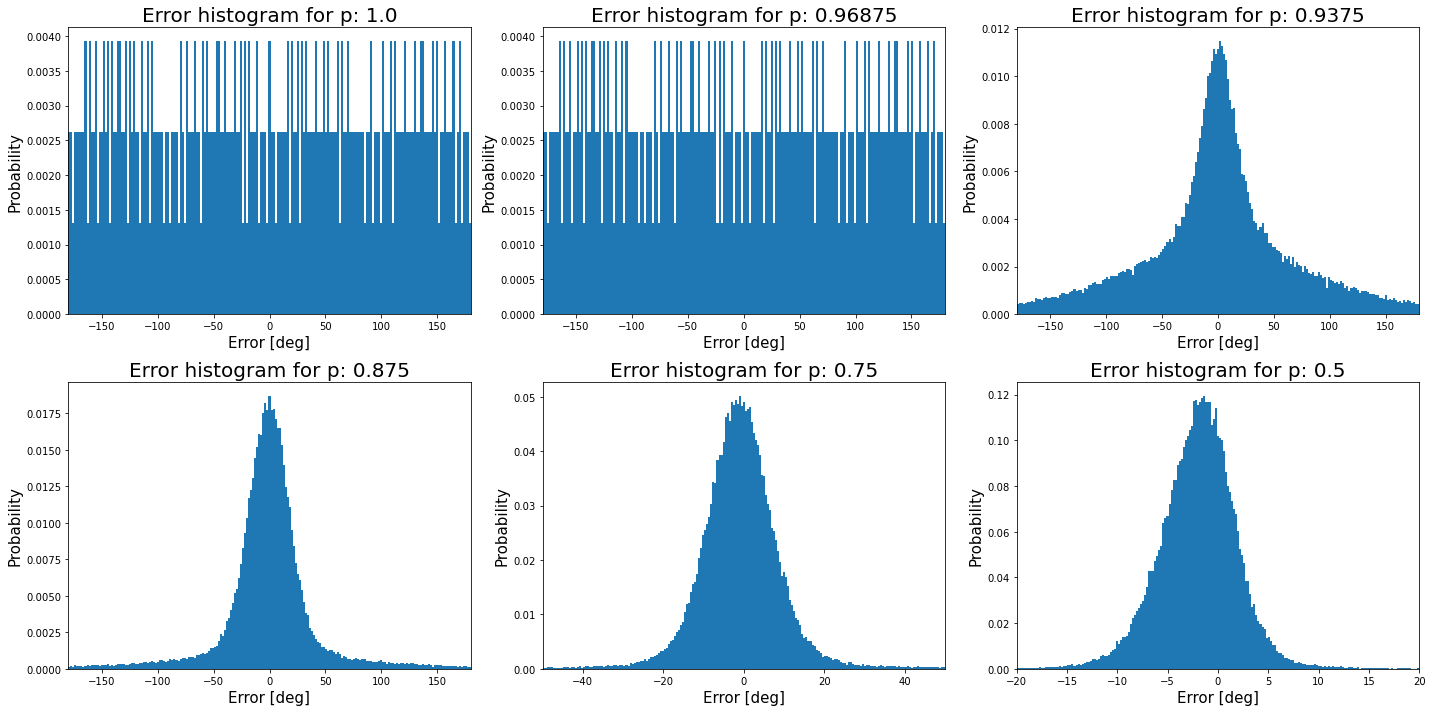

In [141]:
from scipy.stats import norm

#HISTOGRAM ENCODER
folder="Encoder_big_net_optimal_hyp_big"

probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16]
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2]
#probs = [1/4, 1/8,  1/16, 1/32]
#r = {1.0:[0,10000], 1-1/32:[0,10000], 1-1/16:[0,1500], 1-1/8:[0,1500], 1-1/4:[0,300], 1/2:[0,100],1/4:[0,10], 1/8:[0,10],  1/16:[0,10], 1/32:[0,10]}
r = {1.0:[-180,180], 1-1/32:[-180,180], 1-1/16:[-180,180], 1-1/8:[-180,180], 1-1/4:[-50,50], 1/2:[-20,20],1/4:[-5,5], 1/8:[-3,3],  1/16:[-3,3], 1/32:[-3,3]}
fig = plt.figure(figsize=(20,10))
for i, p in enumerate(probs):
    data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")
    #print(np.mean(10*np.log10(data["MSE_array"])))
    #MSE_encoder = data["MSE_array_rad"]*180**2/np.pi**2
    err = data["error_deg"]
    MSE_encoder = err
    #MSE_encoder = err[np.where((err < r[p][1]) & (err > r[p][0]))]
    print(MSE_encoder.shape)
    #print(f"mean linear: {np.mean(MSE_encoder)}, std lin for p {p}: {np.std(MSE_encoder)}, std log : {10*np.log10(np.mean(MSE_encoder)+np.std(MSE_encoder))-10*np.log10(np.mean(MSE_encoder))}")

    ax = fig.add_subplot(2,3,i+1)
    sigma = np.std(MSE_encoder)
    #MSE_encoder = MSE_encoder/sigma
    #sigma = 1
    print(f"Sigma: {sigma}")
    mu = 0
    nbins=200
    bins = np.concatenate([np.array([-1000, r[p][0]-0.001]), np.linspace(r[p][0], r[p][1], nbins) ,[r[p][1]+0.001, 1000]])
    count, bins, ignored = ax.hist(MSE_encoder, bins=bins, density=True, label="prediction error")#, range=r[p])#, bins=30#, range=r[p])
    #xmin, xmax = plt.xlim()
    #xmin, xmax = r[p][0], r[p][1]
    #x = np.linspace(xmin, xmax, 1000)
    #pdf = norm.pdf(x, loc=0, scale=sigma)
    #ax.plot(x, pdf, 'r', linewidth=2, label=rf"pdf: $\mathcal{{N}}$(0, {sigma:.2f})")
    #ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    #title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    ax.set_xlim(r[p])
    ax.set_title(rf"Error histogram for p: {p}", fontsize=20)
    ax.set_ylabel("Probability", fontsize=15)
    ax.set_xlabel(r"Error [deg]", fontsize=15)
    #ax.legend(fontsize=12)
    #ax.tick_params(axis='x', labelsize=4)
    #ax.set_xticks(np.arange(0 15, 5))





            #plt.grid()
            #plt.legend()

            #plt.close()
fig.tight_layout()
os.makedirs(fr'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper/plots/', exist_ok=True)
plt.savefig(rf'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\plots\error_histogram_encoder_bad.png', dpi=600)
plt.savefig(rf'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\plots\error_histogram_encoder_bad.eps', dpi=600, format="eps")
plt.show()

In [113]:
a = np.arange(10, 30, 1)
b = a[np.where((a<20) & (a > 15))]
b



array([16, 17, 18, 19])

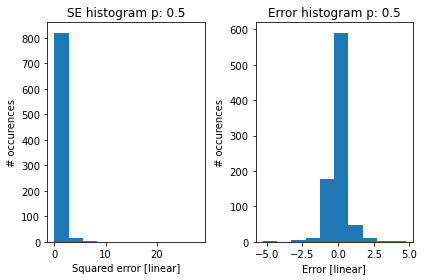

In [160]:
p=0.5
data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")

MSE_encoder = data["MSE_array"]
error_encoder = data["error"]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(MSE_encoder)
ax[1].hist(error_encoder)
ax[0].set_title(f"SE histogram p: {p}")
ax[1].set_title(f"Error histogram p: {p}")
ax[0].set_xlabel("Squared error [linear]")
ax[1].set_xlabel("Error [linear]")
ax[0].set_ylabel("# occurences")
ax[1].set_ylabel("# occurences")
plt.tight_layout()
plt.savefig(fr"C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\plots\se_vs_e_p_{p}.png", dpi=600)
plt.show()


std of linear error :0.24197152256965637, sqrt of mse: 0.24417813122272491


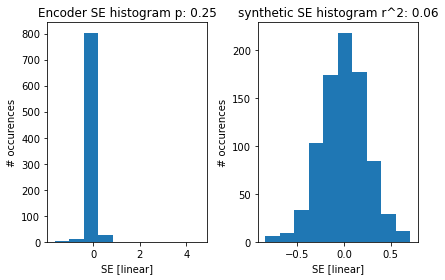

In [215]:
p=0.25
data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")
r2 = data["MSE_avg_linear"]
synthetic = np.random.normal(0, np.sqrt(r2), [844])
print(f"std of linear error :{np.std(data['error'])}, sqrt of mse: {np.sqrt(r2)}")



fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(data["error"])
ax[1].hist(synthetic)
ax[0].set_title(f"Encoder SE histogram p: {p}")
ax[1].set_title(f"synthetic SE histogram r^2: {r2:.2f}")
ax[0].set_xlabel("SE [linear]")
ax[1].set_xlabel("SE [linear]")
ax[0].set_ylabel("# occurences")
ax[1].set_ylabel("# occurences")
plt.tight_layout()
plt.savefig(fr"C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\plots\synthetic_vs_p_{p}_SE.png", dpi=600)
plt.show()


True: -136.6
-0.16
True: -136.6
-0.16
True: -136.6
-45.09
True: -136.6
-80.22
True: -136.6
-126.02
True: -136.6
-128.36


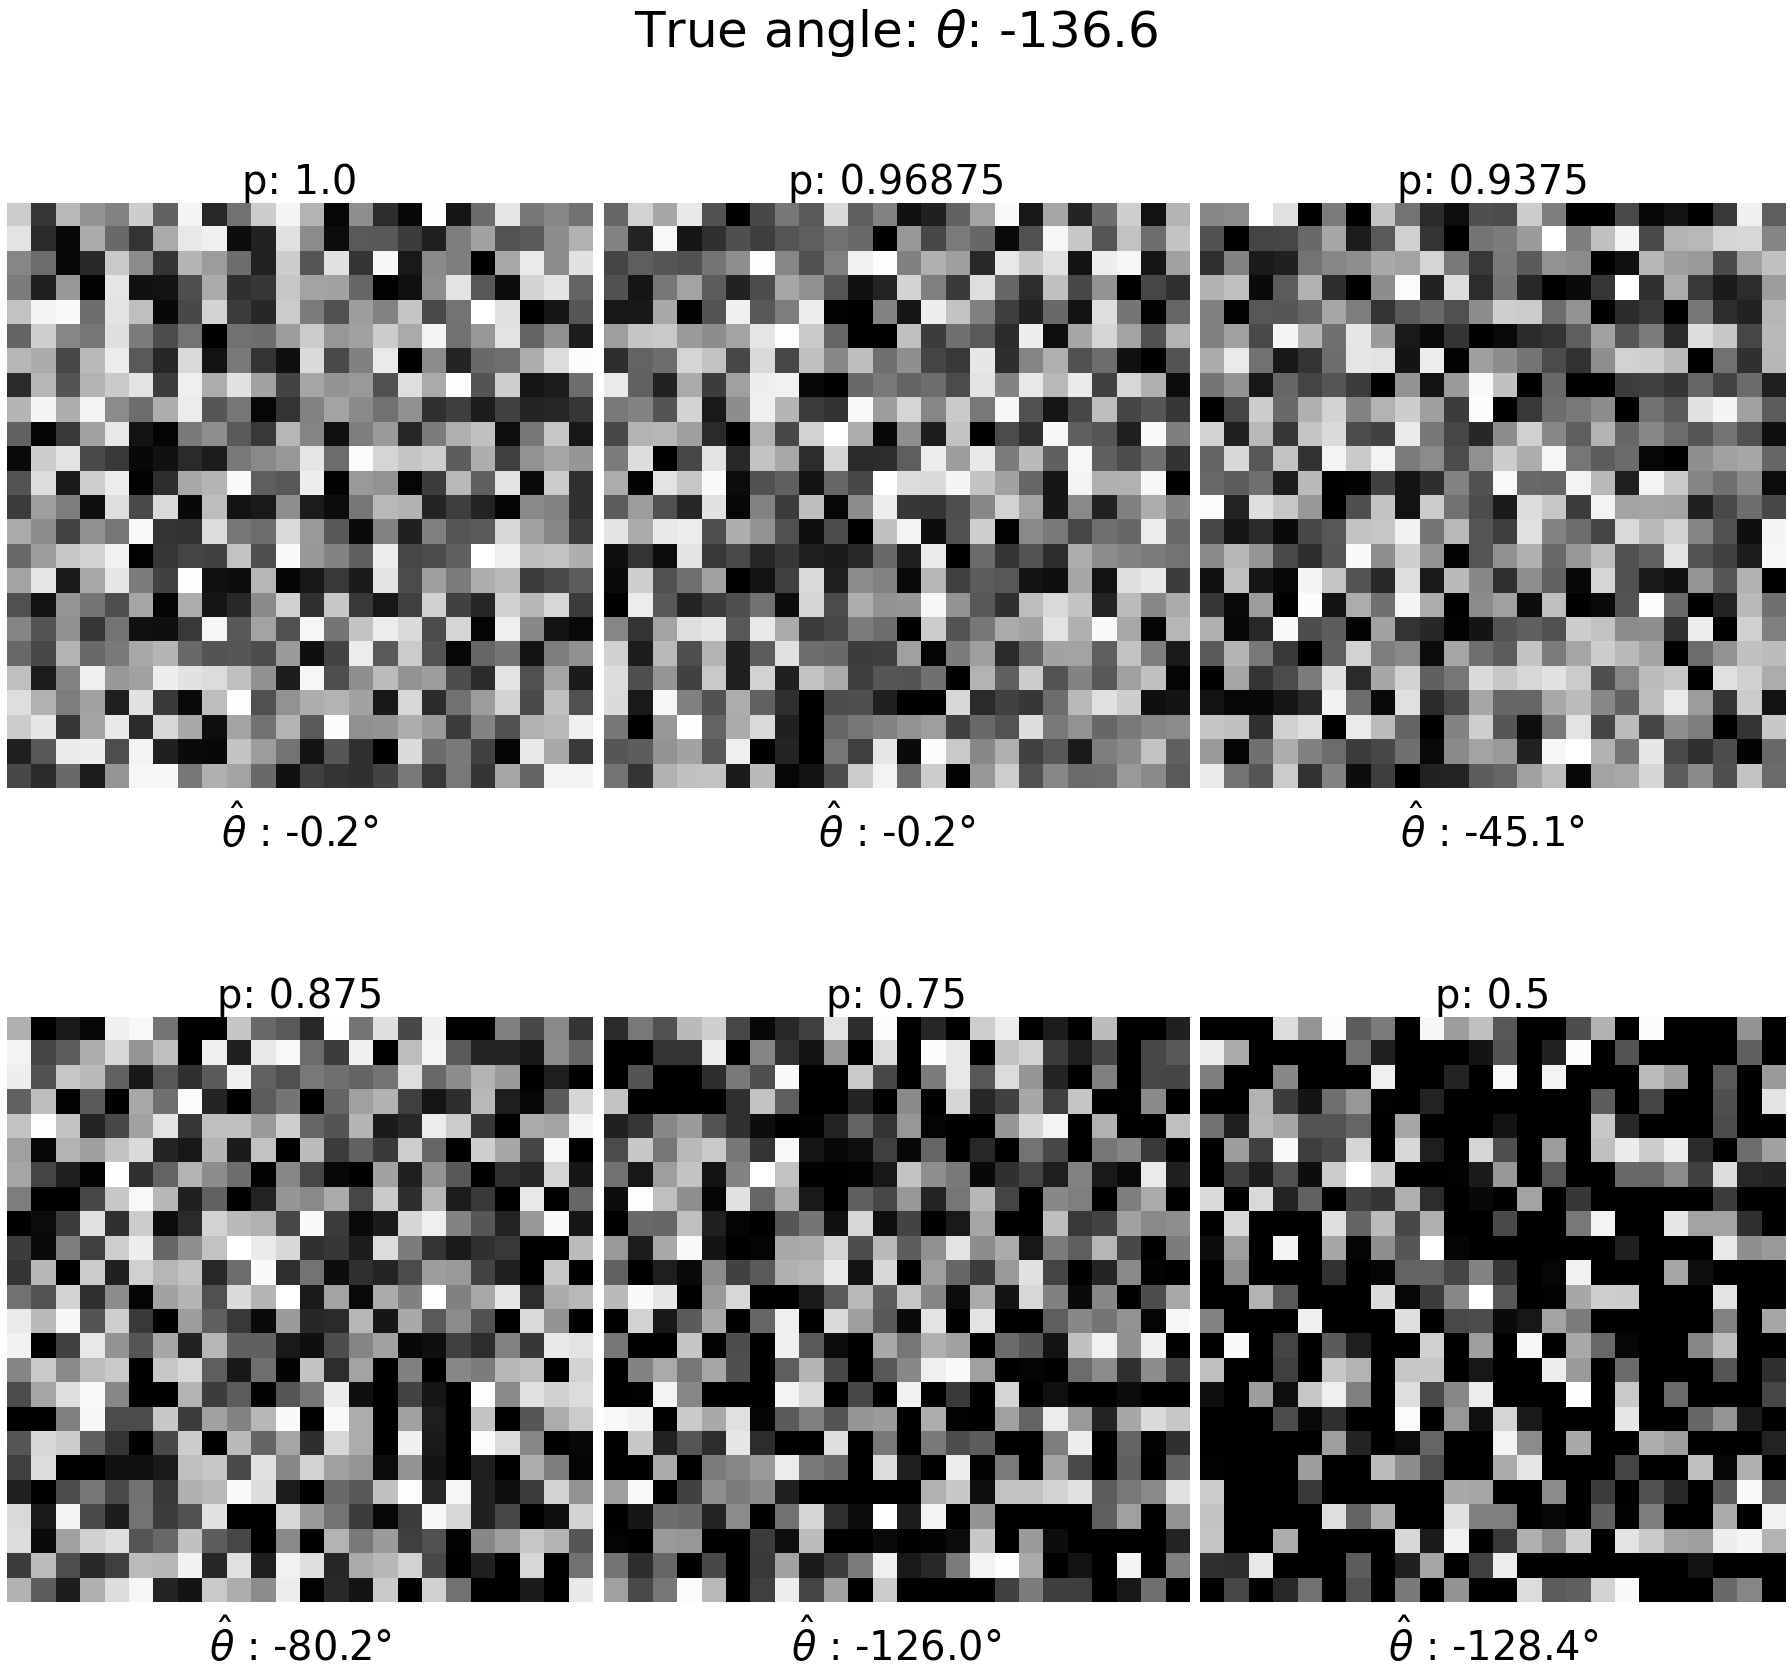

In [35]:
#IMAGE PENDULUM WITH SALT&PEPPER NOISE EXAMPLES & PREDICTION
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch

    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
seed_everything(39)
from encoder_ae_models import Encoder_new as Encoder
#probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16]
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2]
#probs = [1/4, 1/8,  1/16, 1/32]

folder="Encoder_big_net_optimal_hyp_big"


index = 10000
fig = plt.figure(figsize=(25,25))
for i, prob in enumerate(probs):
    data = np.load(f"Datasets/Pendulum/Encoder_dataset/pendulum_images_noisy_encoder_big_p_{prob}.npz")
    noisy_images = torch.from_numpy(data["test_input"][:, index:index+1, ...])
    true = data["test_target"][index]
    print(f"True: {true*180/np.pi}")
    model = Encoder(encoded_dimension=1)
    model_dict = torch.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/models/encoder_p_{prob}.pt")
    model.load_state_dict(model_dict)
    model.eval()



    prediction = model(torch.clamp(noisy_images, min=0, max=255) / 255)
    print(f"{prediction.item()*180/np.pi:.2f}")
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(torch.squeeze(noisy_images).numpy(), cmap="gray")
    ax.set_title(rf"p: {prob}", fontsize=40)
    ax.axis('off')
    ax.text(0.5,-0.1, rf"$\hat{{\theta}}$ : {prediction.item()*180/np.pi:.1f}°", size=40, ha="center",
         transform=ax.transAxes)






            #plt.grid()
            #plt.legend()

            #plt.close()
fig.suptitle(rf"True angle: $\theta$: {true*180/np.pi}", fontsize=50)
fig.tight_layout(h_pad=3)
os.makedirs(fr'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper/plots/', exist_ok=True)
plt.savefig(rf'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\plots\sample_images_bad.png', dpi=600)
plt.savefig(rf'C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Simulations_results\Pendulum\{folder}\salt&pepper\plots\sample_images_bad.eps', dpi=600, format="eps")
plt.show()

In [32]:
prob = 0.5
noisy_images = np.load(f"Datasets/Pendulum/Encoder_dataset/pendulum_images_noisy_encoder_big_p_{prob}.npz")
noisy_images["test_target"].shape

(84400,)

In [8]:
a = np.array([10,20])
b = torch.from_numpy(a) + 2
b[0] = 4
print(b)
print(a)

tensor([ 4, 22], dtype=torch.int32)
[10 20]


EKF - MSE LOSS TOTAL: tensor(-13.4283) [dB]
EKF - MSE STD TOTAL: tensor(nan) [dB]
Inference Time: 0.8658537864685059
EKF - MSE LOSS TOTAL: tensor(-8.2115) [dB]
EKF - MSE STD TOTAL: tensor(nan) [dB]
Inference Time: 0.6677536964416504


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


EKF - MSE LOSS TOTAL: tensor(-7.5953) [dB]
EKF - MSE STD TOTAL: tensor(nan) [dB]
Inference Time: 0.6413049697875977


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


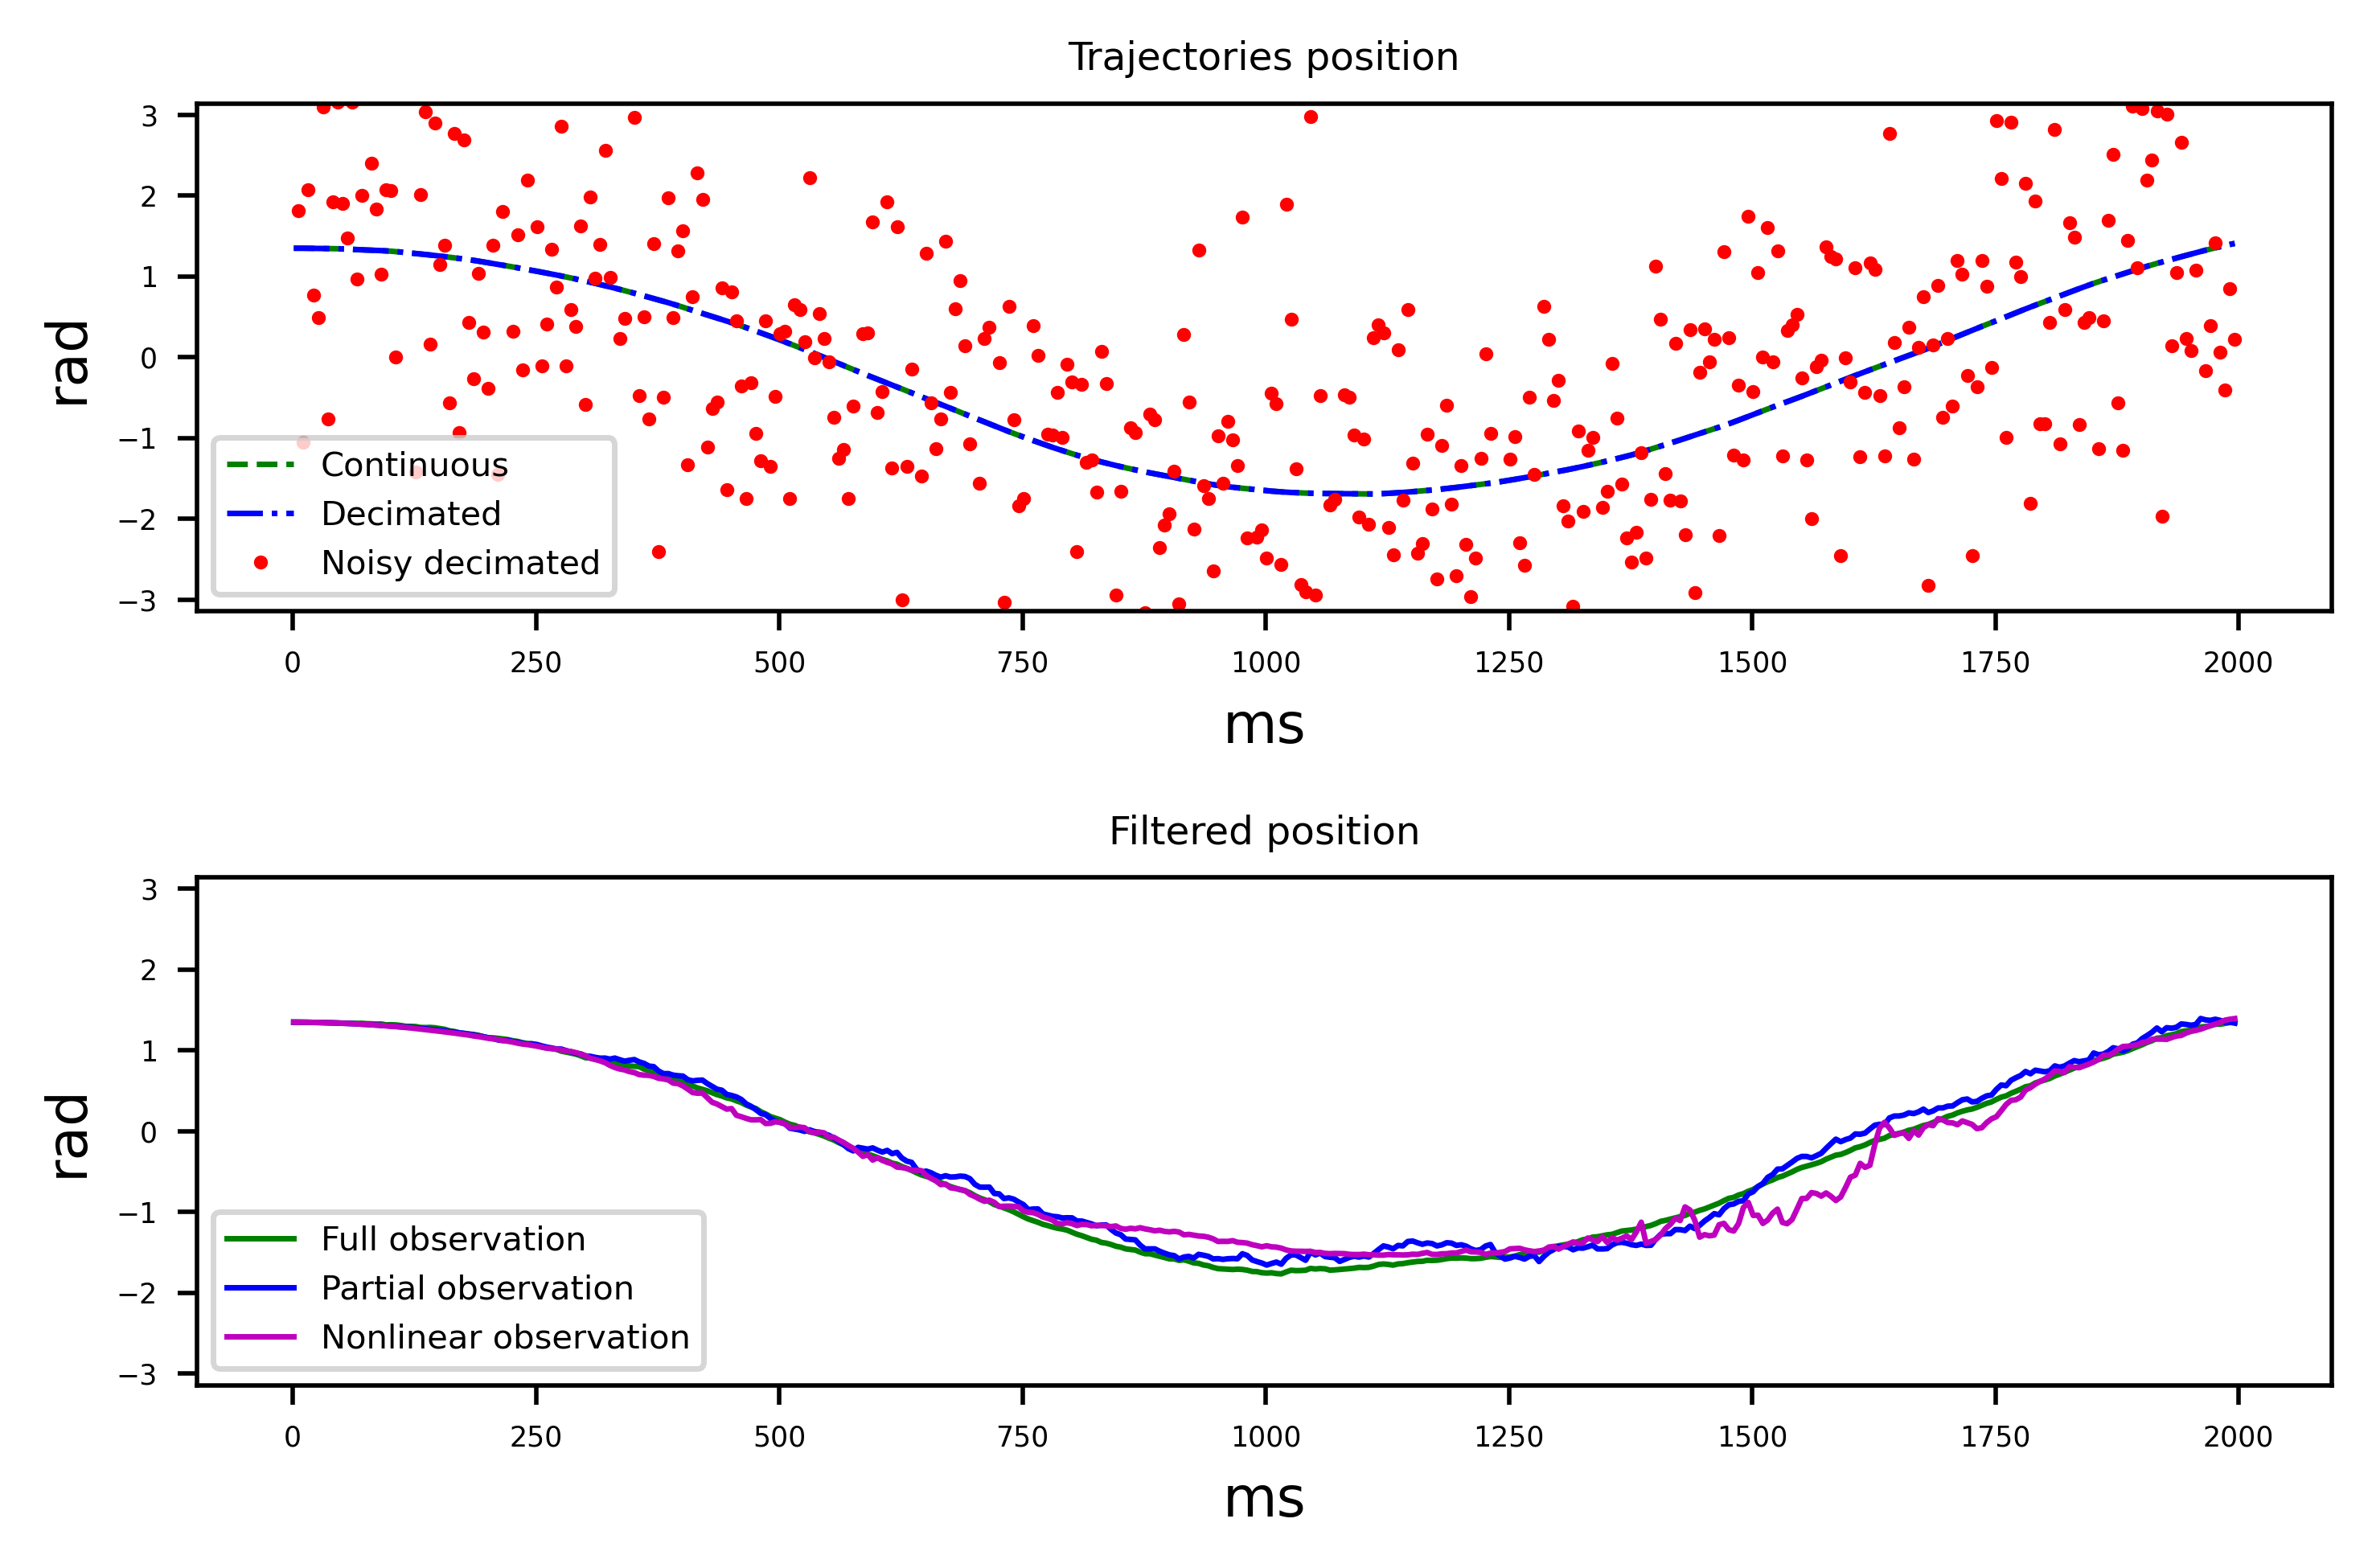

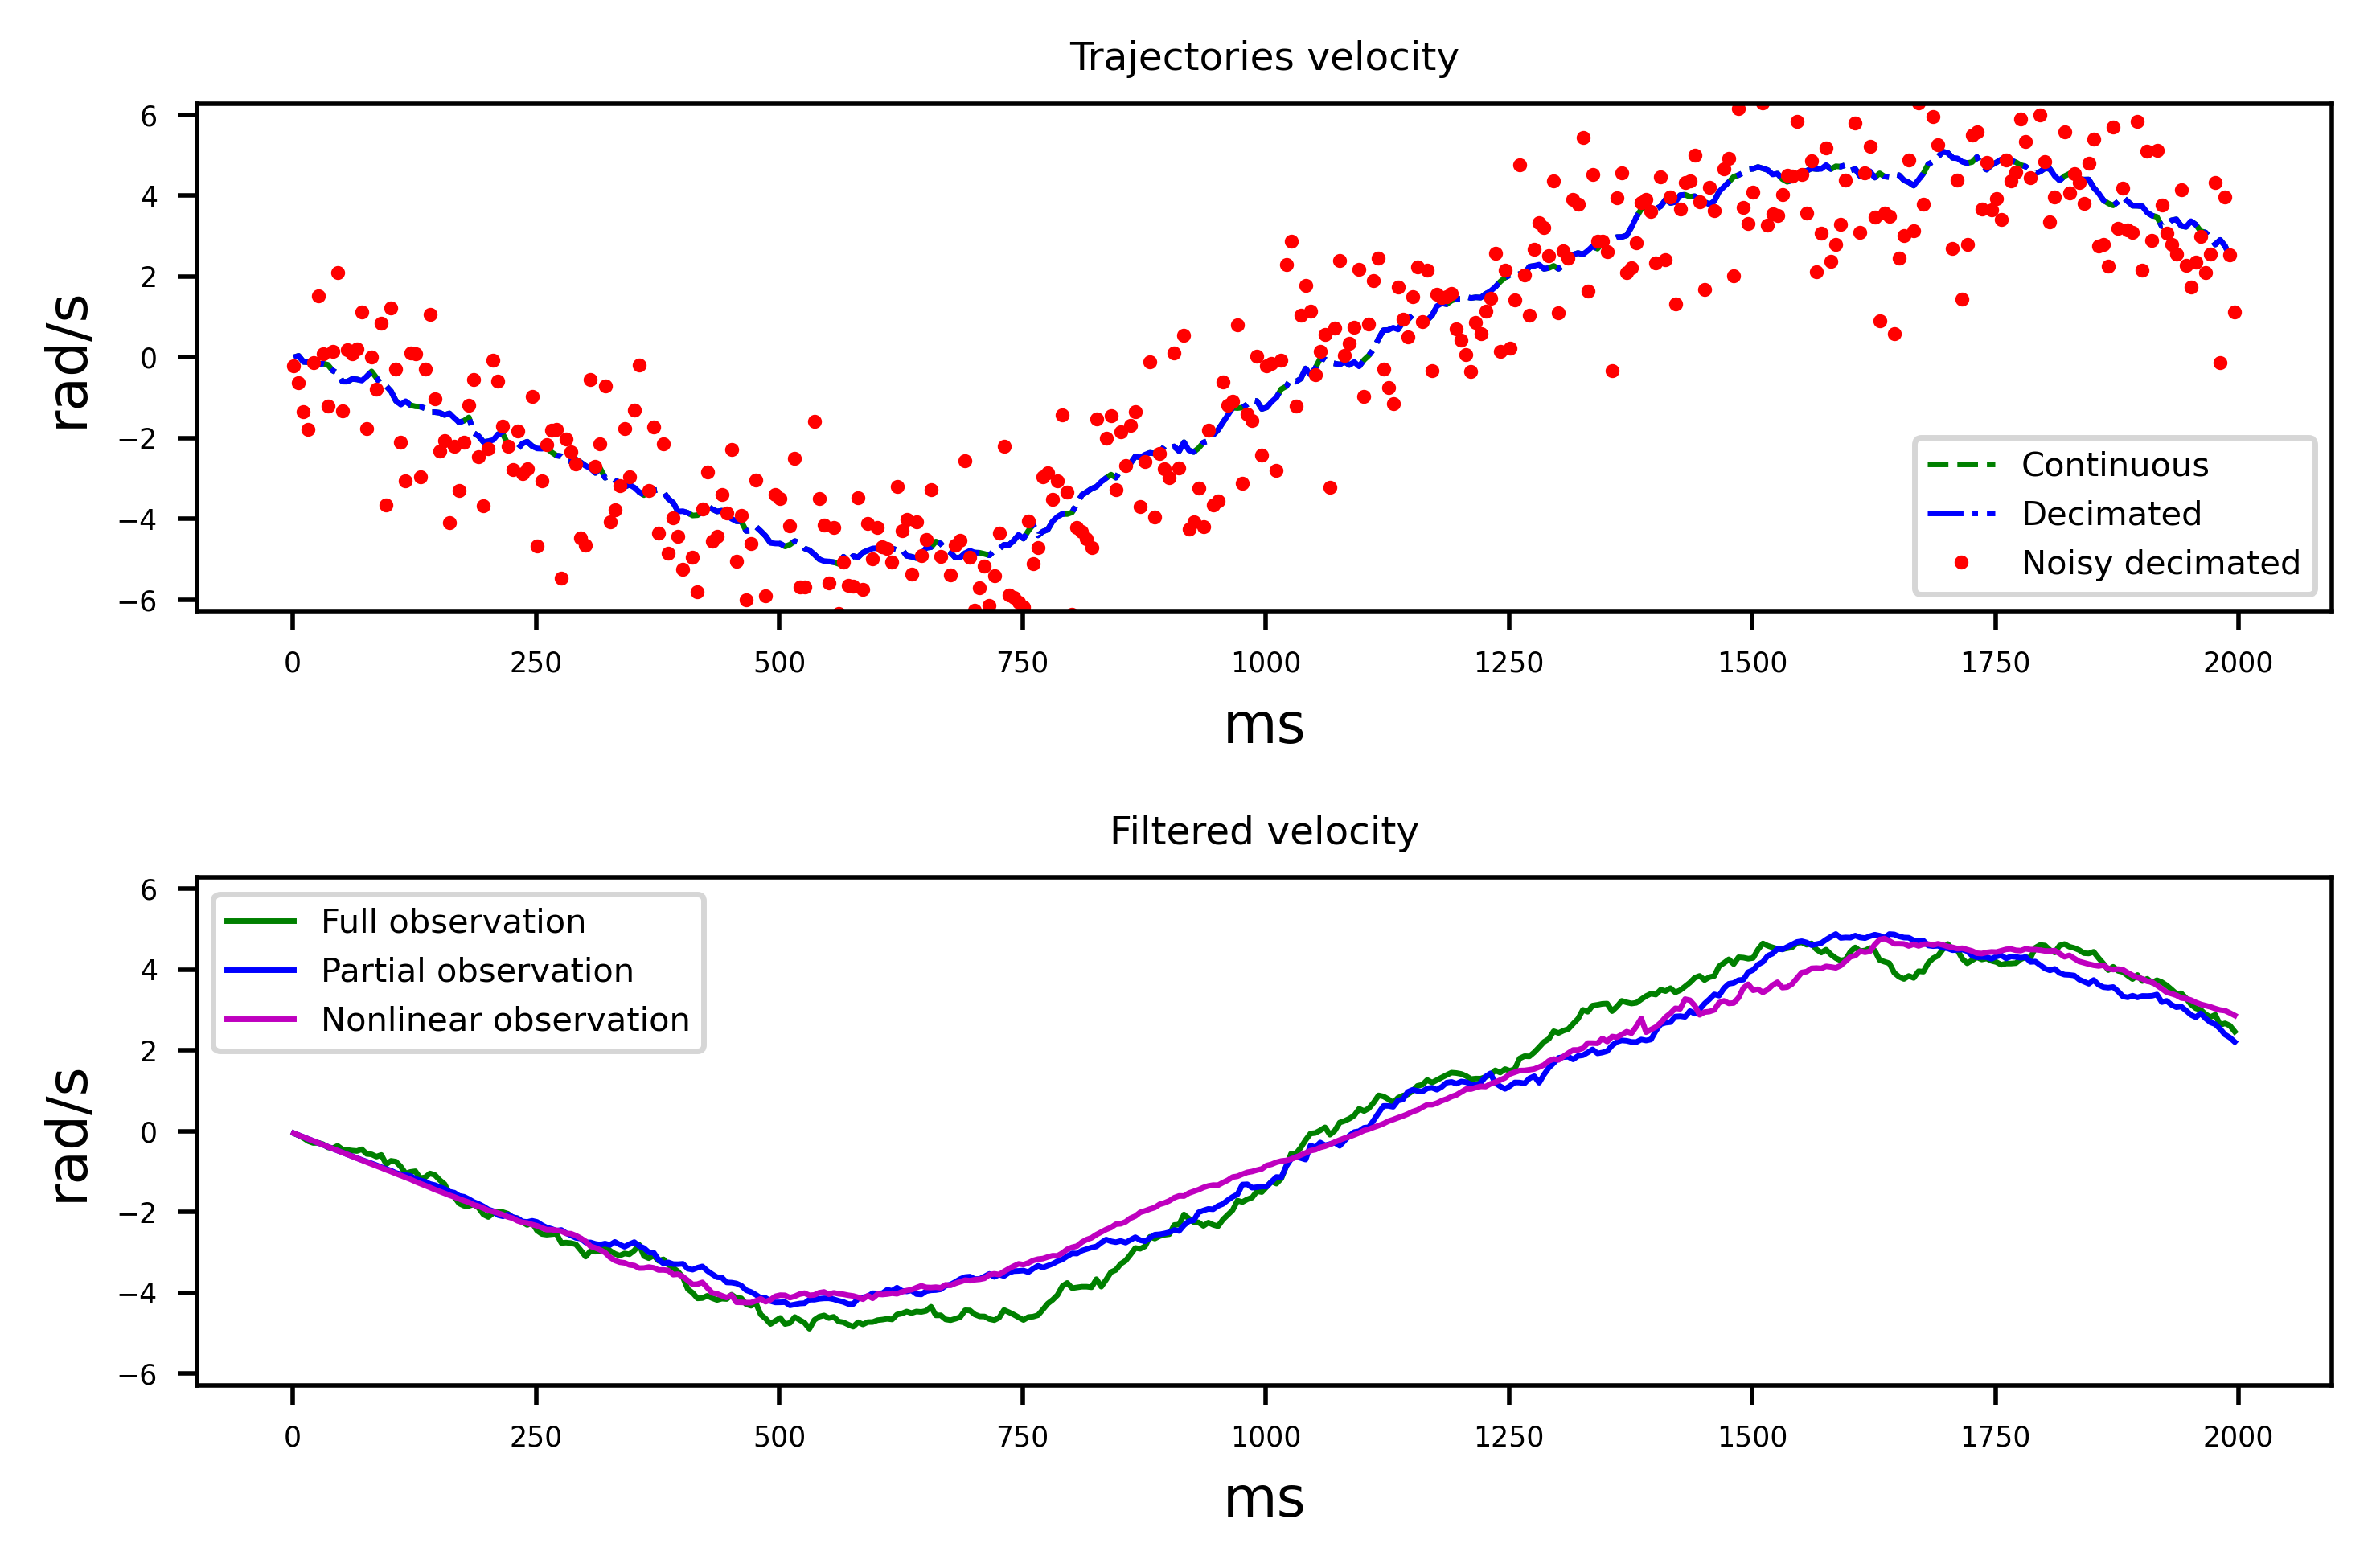

In [158]:
###############################
#### PLOT TRAJECTORIES EKF ####
###############################
import matplotlib
import os
import copy
import torch
import sys
from datetime import datetime
from Extended_sysmdl_visual import SystemModel
import numpy as np
from EKF_test_visual import EKFTest
#sys.path.insert(1, "Simulations/Pendulum/model.py")
from model import f, h_full, h_partial, h_nonlinear
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    dev = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc.
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    dev = torch.device("cpu")
    print("Running on the CPU")

#h = h_partial
#modelKnow = "full"
NL_m = 2  # DIMENSION OF STATE
  # DIMENSION of observation
opt_wrt_to = "total"
NL_m1_0 = torch.FloatTensor([0.5, 0])
NL_m2_0 = torch.tensor([[0.0, 0.0], [0.0, 0.0]])
NL_T = 400  #sequence length for training/cv set, here we not used
NL_T_test = 400  #sequence length for test set
random_init = 0
true_init = 1

vs = [0]  #in [dB]
r2s = [2]
index = 10
predicted = []
linewidth=0.5
markersize=2
for modelKnow in ["full", "partial", "nonlinear"]:
    for v in vs:
        q2s = list(map(lambda x: x * (10 ** (v / 10)), r2s))
        for r2, q2 in zip(r2s, q2s):

            best_q2 = np.load(f"Simulations_results/Pendulum/EKF/optimiziation_wrt_" + opt_wrt_to +"_mse_results"+ f"/{modelKnow}_observation_model/v_{v}db_r2_{r2:.0e}_q2_{q2:.0e}.npz")["best_q2"]
            best_r2 = r2
            r = np.sqrt(r2)

            if modelKnow == "full":
                input_ = np.load(
                    f"Datasets/Pendulum/decimated_noisy_data/pendulum_decimated_noisy_q2_{q2:.0e}_r2_{r2:.0e}_v{v}.npz")
                target = np.load(
                    f"Datasets/Pendulum/decimated_clean_data/pendulum_decimated_q2_{q2:.0e}_v_{v}.npz")
                input_test = torch.from_numpy(input_["test_set"][index:index+1, :, :]).float().to(dev)
                target_test = torch.from_numpy(target["test_set"][index:index+1, ...]).float().to(dev)
                decimated = copy.deepcopy(target_test)
                noisy = copy.deepcopy(input_test)
                NL_n = 2
                noisy_r = copy.deepcopy(noisy)
                h = h_full

            if modelKnow == "nonlinear":
                input_ = np.load(
                    f"Datasets/Pendulum/decimated_clean_data/pendulum_decimated_q2_{q2:.0e}_v_{v}.npz")
                input_test = input_["test_set"]
                target_test = np.copy(input_test[index:index+1, ...])
                target_test = torch.from_numpy(target_test).float().to(dev)

                input_test = input_test[index:index+1, 0:1, :]
                input_test = np.sin(input_test) + np.random.randn(*input_test.shape) * r
                input_test = torch.from_numpy(input_test).float().to(dev)
                decimated = copy.deepcopy(target_test)
                noisy = copy.deepcopy(input_test)
                NL_n = 1
                h = h_nonlinear

            if modelKnow == "partial":
                input_ = np.load(
                    f"Datasets/Pendulum/decimated_noisy_data/pendulum_decimated_noisy_q2_{q2:.0e}_r2_{r2:.0e}_v{v}.npz")
                target = np.load(
                    f"Datasets/Pendulum/decimated_clean_data/pendulum_decimated_q2_{q2:.0e}_v_{v}.npz")
                input_test = torch.from_numpy(input_["test_set"][index:index+1, 0:1, :]).float().to(dev)
                target_test = torch.from_numpy(target["test_set"][index:index+1, ...]).float().to(dev)
                decimated = copy.deepcopy(target_test)
                noisy = copy.deepcopy(input_test)
                NL_n = 1
                h = h_partial

            sys_model = SystemModel(f, np.sqrt(best_q2), h, np.sqrt(best_r2), NL_T, NL_T_test, NL_m, NL_n, "pendulum")
            sys_model.InitSequence(NL_m1_0, NL_m2_0)

            [MSE_EKF_linear_arr_total, MSE_EKF_linear_arr_theta, MSE_EKF_linear_arr_omega, MSE_EKF_dB_avg_total,
             MSE_EKF_dB_avg_theta,
             MSE_EKF_dB_avg_omega, MSE_EKF_dB_std_total, MSE_EKF_dB_std_theta, MSE_EKF_dB_std_omega,
             KG_array, EKF_out] = EKFTest(SysModel=sys_model, test_input=input_test, test_target=target_test,
                                          model_AE_conv=None, matrix_data_flag=True, modelKnowledge=modelKnow,
                                          true_init_flag=true_init, random_init_flag=random_init)
            predicted.append(EKF_out)


matplotlib.rc('xtick', labelsize=5)
matplotlib.rc('ytick', labelsize=5)
fig1, ax1 = plt.subplots(nrows=2, ncols=1)
fig1.dpi=500
#fig1.suptitle(fr"Sample position trajectory for $r^2$={r2}, $\nu$={v} dB, $q^*$={best_q2:.2}")
ax1[0].plot([i for i in range(1,2001, 5)], decimated[0,0,:].cpu(), 'g--', linewidth=1, markersize=3, label="Continuous")
ax1[0].plot([i for i in range(1,2001, 5)], decimated[0,0,:].cpu(), 'b-.', linewidth=1, markersize=3, label="Decimated")
ax1[0].plot([i for i in range(1,2001, 5)], noisy_r[0,0,:].cpu(), 'r.', linewidth=1, markersize=3, label="Noisy decimated")
ax1[0].set_ylim([-np.pi, np.pi])
ax1[0].set_ylabel("rad")
ax1[0].set_xlabel("ms")
ax1[0].legend(prop={'size': 6})
ax1[0].set_title("Trajectories position", size=7)

ax1[1].plot([i for i in range(1,2001, 5)], predicted[0][0,0,:].cpu(), 'g', label="Full observation", linewidth=1, markersize=3)
ax1[1].plot([i for i in range(1,2001, 5)], predicted[1][0,0,:].cpu(), 'b', label="Partial observation", linewidth=1, markersize=3)
ax1[1].plot([i for i in range(1,2001, 5)], predicted[2][0,0,:].cpu(), 'm', label="Nonlinear observation", linewidth=1, markersize=3)
ax1[1].set_ylim([-np.pi, np.pi])
ax1[1].set_ylabel("rad")
ax1[1].set_xlabel("rad")
ax1[1].set_xlabel("ms")
ax1[1].legend(prop={'size': 6})
ax1[1].set_title("Filtered position", size=7)

fig1.tight_layout()
fig1.savefig(rf'Simulations_results\Pendulum\EKF\trajectories_plots\trajectory_position.eps', dpi=500, format="eps")

fig2, ax2 = plt.subplots(nrows=2, ncols=1)
fig2.dpi=500

#fig2.suptitle(fr"Sample velocity trajectory for $r^2$={r2}, $\nu$={v} dB, $q^*$={best_q2:.2}")
ax2[0].plot([i for i in range(1,2001, 5)], decimated[0,1,:].cpu(), 'g--', linewidth=1, markersize=3, label="Continuous")
ax2[0].plot([i for i in range(1,2001, 5)], decimated[0,1,:].cpu(), 'b-.', linewidth=1, markersize=3, label="Decimated")
ax2[0].plot([i for i in range(1,2001, 5)], noisy_r[0,1,:].cpu(), 'r.', linewidth=1, markersize=3, label="Noisy decimated")
ax2[0].set_ylim([-2*np.pi, 2*np.pi])
ax2[0].set_ylabel("rad/s")
ax2[0].set_xlabel("ms")
ax2[0].legend(prop={'size': 6})
ax2[0].set_title(f"Trajectories velocity", size=7)




ax2[1].plot([i for i in range(1,2001, 5)], predicted[0][0,1,:].cpu(), 'g', label="Full observation", linewidth=1, markersize=3)
ax2[1].plot([i for i in range(1,2001, 5)], predicted[1][0,1,:].cpu(), 'b', label="Partial observation", linewidth=1, markersize=3)
ax2[1].plot([i for i in range(1,2001, 5)], predicted[2][0,1,:].cpu(), 'm', label="Nonlinear observation", linewidth=1, markersize=3)
ax2[1].set_ylim([-2*np.pi, 2*np.pi])
ax2[1].set_ylabel("rad/s")
ax2[1].set_xlabel("ms")
ax2[1].set_title(f"Filtered velocity", size=7)
ax2[1].legend(prop={'size': 6})
fig2.tight_layout()
fig2.savefig(rf'Simulations_results\Pendulum\EKF\trajectories_plots\trajectory_velocity.eps', dpi=500, format="eps")



In [67]:
a = np.load("Simulations_results/Pendulum/Encoder_big_net_optimal_hyp_2/salt&pepper/losses/loss_p_0.5.npz")

In [69]:
a["error"].shape

(844,)

EKF r2 10: MSE :-3.8626697063446045
EKF r2 2: MSE :-5.013474464416504
EKF r2 1: MSE :-5.56825065612793
EKF r2 0.5: MSE :-6.191221237182617
EKF r2 0.1: MSE :-7.5158491134643555
EKF r2 0.01: MSE :-9.650969505310059
EKF r2 0.001: MSE :-12.037904739379883
EKF r2 0.0001: MSE :-14.609169960021973
ENC p 1.0, r2: -5.137629895860993: MSE :-2.922511339187622
3.2640965
ENC p 0.96875, r2: -5.137630530302198: MSE :-2.922513961791992
3.264097
ENC p 0.9375, r2: -2.6468981716664652: MSE :-3.3451404571533203
1.8394578
ENC p 0.875, r2: 0.9125440869870369: MSE :-5.411172389984131
0.81048614
ENC p 0.75, r2: 8.299931031609775: MSE :-7.463660717010498
0.14791319
ENC p 0.5, r2: 17.215976760590088: MSE :-9.418635368347168
0.018984638
ENC p 0.25, r2: 27.917774613361466: MSE :-12.334465980529785
0.001615186
ENC p 0.125, r2: 36.25090594840739: MSE :-14.161060333251953
0.00023708791
ENC p 0.0625, r2: 37.5898478645007: MSE :-14.199420928955078
0.00017418679
ENC p 0.03125, r2: 42.11120652461554: MSE :-14.9721632003

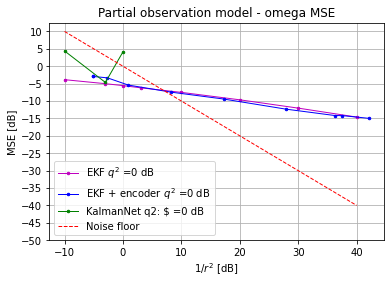

In [191]:
##########################################
##### EKF CONSTANT Q2 experiment plot ####
##########################################

linewidth=1
markersize=5
title_size=10
ax_label_size=7
r2s = [10, 2, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
noise_floor = list(map(lambda x: 10*np.log10(1/x), r2s))
noise_floor = list(zip(noise_floor, [i*(-1) for i in noise_floor]))
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]

avg_string = "MSE_db_avg_"
colors = {0: ("m.-", "b.-", "g.-"), -10: ("b.-", "bv-"), -20: ("g.-", "gv-")}
folder = "constant_q2_experiment_NO_GRID"
observation = "partial"
q2s = [0, -10, -20]
q2s = [0]
q2s = list(map(lambda x: (10 ** (x / 10)), q2s))
mse = "omega"
r22s = [10, 2, 1]
v=0
for q2 in q2s:
    MSE = []
    for r2 in r2s:
        data = np.load(f"Simulations_results/Pendulum/EKF/{folder}/{observation}_observation_model_opt_wrt_theta/const_q2_{q2:.0e}_r2_{r2:.0e}.npz")
        print(f"EKF r2 {r2}: MSE :{data[avg_string+mse].item()}")
        MSE.append((10*np.log10(1/r2), data[avg_string+mse].item()))
    plt.plot(*zip(*MSE), colors[10*int(np.log10(q2))][0], label=fr"EKF $q^2$ ={10*int(np.log10(q2))} dB", linewidth=linewidth, markersize=markersize)
    MSE = []

    for p in probs:
        data_2 = np.load(f"Simulations_results/Pendulum/EKF+Encoder/constant_q2_experiment_encoder_q2_grid/{observation}_observation_model/const_q2_{q2:.0e}_p_{p}.npz")
        print(f"ENC p {p}, r2: {(10*np.log10(1/data_2['r2']))}: MSE :{data_2['MSE_db_avg_'+mse].item()}")
        MSE.append((10*np.log10(1/data_2["r2"]), data_2["MSE_db_avg_"+mse].item()))
        print(data_2["r2"])
    plt.plot(*zip(*MSE), colors[10*int(np.log10(q2))][1], label=fr"EKF + encoder $q^2$ ={10*int(np.log10(q2))} dB", linewidth=linewidth, markersize=markersize)
    MSE = []
    for r22 in r22s:
        data_3 = np.load(f"Simulations_results/Pendulum/KalmanNet/constant_q2_experiment/experiment_{q2:.0e}_r2_{r22:.0e}_v_0/losses/test_{q2:.0e}_{r22:.0e}_v{v}.npz")
        #print(f"KalmanNet r2: {(10*np.log10(1/data_3['r2']))}: MSE :{data_3['MSE_db_avg_'+mse].item()}")
        MSE.append((10*np.log10(1/r22), data_3["MSE_db_avg_"+mse].item()))
        #print(data_2["r2"])
    plt.plot(*zip(*MSE), colors[10*int(np.log10(q2))][2], label=fr"KalmanNet q2: $ ={10*int(np.log10(q2))} dB", linewidth=linewidth, markersize=markersize)


plt.plot(*zip(*noise_floor), 'r--' , label="Noise floor", linewidth=linewidth, markersize=markersize)
plt.title(rf"{observation.capitalize()} observation model - {mse} MSE")
plt.ylabel("MSE [dB]")
plt.xlabel(r"$1/r^2$ [dB]")
#plt.xticks([i for i in range(-10,45, 5)])
plt.yticks([i for i in range(-50,15, 5)])
plt.grid()
plt.legend()

os.makedirs(r'Simulations_results\Pendulum\EKF\plots/', exist_ok=True)
#plt.savefig(rf'Simulations_results\Pendulum\EKF\{folder}\{observation}_observation_constant_q2.eps', dpi=600, format="eps")
plt.savefig(rf'Simulations_results\Pendulum\EKF\{folder}\{observation}_observation_constant_q2_omega_mse.png', dpi=600)
#plt.close()
plt.show()


In [178]:
a = np.load("Simulations_results/Pendulum/KalmanNet/constant_q2_experiment/experiment_1e+00_r2_1e+00_v_0/losses/test_1e+00_1e+00_v0.npz")

In [181]:
a["MSE_db_avg_theta"]

array(-10.892858, dtype=float32)

In [186]:

observation="partial"
q2=1
##### MAKE TABLES
from tabulate import tabulate
from texttable import Texttable
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]

header = ["probabilities", *[str(i) for i in probs]]
avg_db = ["avg theta MSE [dB]"]
r2 = ["$1/r^2$ [dB] from encoder"]

observation="partial"
q2=1

for p in probs:
    data = np.load(f"Simulations_results/Pendulum/EKF/constant_q2_experiment_encoder_r2_grid/{observation}_observation_model_opt_wrt_theta/const_q2_{q2:.0e}_p_{p}.npz")
    avg_db.append(str(data["MSE_db_avg_theta"]))
    r2.append(str((10*np.log10(1/data_2["r2"]))))

rows = [header, avg_db, r2]

table = Texttable()
table.set_cols_align(["c"] * 11)
table.set_deco(Texttable.HEADER | Texttable.VLINES)
table.add_rows(rows)

print('Tabulate Table:')
print(tabulate(rows, headers='firstrow'))

print('\nTexttable Table:')
print(table.draw())

print('\nTabulate Latex:')
print(tabulate(rows, headers='firstrow', tablefmt='latex'))

Tabulate Table:
probabilities                    1.0    0.96875     0.9375      0.875       0.75        0.5       0.25      0.125     0.0625    0.03125
-------------------------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
avg theta MSE [dB]         -11.2555   -11.2591   -11.2557   -11.2609   -11.3085   -15.5303   -23.3962   -21.972    -21.7998   -23.0056
$1/r^2$ [dB] from encoder    2.96389    2.96389    2.96389    2.96389    2.96389    2.96389    2.96389    2.96389    2.96389    2.96389

Texttable Table:
proba |  1.0  | 0.968 | 0.937 | 0.875 | 0.75  | 0.5  | 0.25 | 0.12 | 0.06 | 0.03
bilit |       |  75   |   5   |       |       |      |      |  5   |  25  | 125 
 ies  |       |       |       |       |       |      |      |      |      |     
======+=======+=======+=======+=======+=======+======+======+======+======+=====
 avg  | -11.2 | -11.2 | -11.2 | -11.2 | -11.3 | -15. | -23. | -21. | -21. | -23.
theta |  55   |  5

In [153]:
##### MAKE TABLES
from tabulate import tabulate
from texttable import Texttable
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]
folder = "Encoder_big_net_optimal_hyp_big"
header = ["p", *[str(i) for i in probs]]
avg_e_rad = ["avg E [rad]"]
avg_e_deg = ["avg E [deg]"]
avg_se_rad = ["avg SE [rad^2]"]
avg_se_deg = ["avg SE [deg^2]"]
std_db = ["std MSE [dB]"]
avg = ["mu MSE [rad]"]
std_rad = ["sigma MSE [rad]"]
avg_deg = ["mu MSE [deg]"]
std_deg = ["sigma MSE [deg]"]
avg_db = ["avg SE [db]"]


for p in probs:
    data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")
    avg_e_rad.append(str(np.mean(np.absolute(data["error_rad"]))))
    avg_e_deg.append(str(np.mean(np.absolute(data["error_deg"]))))
    avg_se_rad.append(str(np.mean(data["MSE_avg_linear_rad"])))
    avg_se_deg.append(str(np.mean(data["MSE_avg_linear_deg"])))
    avg_db.append(str(np.mean(data["MSE_avg_dB_rad"])))
    #avg.append(str(np.mean(data["MSE_array"])))
    #std.append(str(np.std(data["MSE_array"])))
    #avg_deg.append(str(np.mean((np.sqrt(data["MSE_array"])*180/np.pi)**2)))
    #std_deg.append(str(np.std(data["MSE_array"]*(180**2)/(np.pi**2))))$
    std_deg.append(str(np.std(data["error_deg"])))
    std_rad.append(str(np.std(data["error_rad"])))

rows = [header, avg_e_deg, std_deg, avg_e_rad, std_rad, avg_se_deg, avg_se_rad, avg_db]

table = Texttable()
table.set_cols_align(["c"] * 11)
table.set_deco(Texttable.HEADER | Texttable.VLINES)
table.add_rows(rows)

print('Tabulate Table:')
print(tabulate(rows, headers='firstrow'))

print('\nTexttable Table:')
print(table.draw())

print('\nTabulate Latex:')
print(tabulate(rows, headers='firstrow', tablefmt='latex'))

Tabulate Table:
p                        1.0      0.96875       0.9375        0.875        0.75          0.5          0.25          0.125         0.0625        0.03125
---------------  -----------  -----------  -----------  -----------  ----------  -----------  ------------  -------------  -------------  -------------
avg E [deg]         89.788       89.788      53.6625      29.3678      9.52261     3.63265      1.08188       0.443148       0.431093       0.243407
sigma MSE [deg]    103.515      103.515      77.7082      51.5781     22.0243      7.66946      2.27831       0.88186        0.755317       0.447695
avg E [rad]          1.5671       1.5671      0.936587     0.512565    0.166201    0.0634016    0.0188824     0.00773439     0.00752399     0.00424826
sigma MSE [rad]      1.80668      1.80668     1.35626      0.900208    0.384397    0.133857     0.0397641     0.0153914      0.0131828      0.00781375
avg SE [deg^2]   10715.4      10715.4      6038.58      2660.67      485.57     

In [62]:
folder = "Encoder_big_net_optimal_hyp_big"
p = 1.0
data = np.load(f"Simulations_results/Pendulum/{folder}/salt&pepper/losses/loss_p_{p}.npz")
data.files

['MSE_avg_linear_rad',
 'MSE_avg_linear_deg',
 'MSE_std_rad',
 'MSE_std_deg',
 'MSE_avg_dB_rad',
 'MSE_std_dB',
 'MSE_array_rad',
 'learning_rate',
 'weight_decay',
 'error_rad',
 'error_deg']

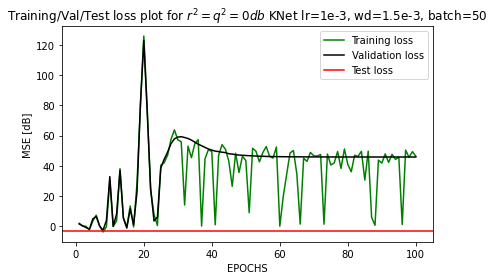

In [195]:
#KALMAN NET LOSS PLOT
loss = np.load("Simulations_results/Pendulum/KalmanNet/partial_observation_lr_0.001_WD_0.0015_BS_50/training_loss_q2_1e+00_r2_1e+00_v_0.npz")
test_ = np.load("Simulations_results/Pendulum/KalmanNet/partial_observation_lr_0.001_WD_0.0015_BS_50/test_1e+00_1e+00_v0.npz")
train = loss["training_loss"]
val = loss["validation_loss"]
test = test_['MSE_db_avg_total']

plt.plot([i+1 for i in range(len(train))], 10*np.log10(train), "g-", label="Training loss")
plt.plot([i+1 for i in range(len(val))], 10*np.log10(val), "k-", label="Validation loss")
plt.axhline(test, color="r", label = "Test loss")
plt.xlabel("EPOCHS")
plt.ylabel("MSE [dB]")
plt.title(r"Training/Val/Test loss plot for $r^2=q^2=0db$ KNet lr=1e-3, wd=1.5e-3, batch=50")
plt.legend()
plt.tight_layout()
plt.savefig(rf'Simulations_results/Pendulum/KalmanNet/partial_observation_lr_0.001_WD_0.0015_BS_50/loss_plot_q2_1e+00_r2_1e+00_v_0.png', dpi=600)
plt.show()


In [3]:
    def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [2]:
from encoder_ae_models import Encoder_small
model = Encoder_small(encoded_dimension=1)


In [4]:
count_parameters(model)

285

In [16]:
np.array([[[-179.97],[-179.98]]]).shape

(1, 2, 1)

In [226]:
from PendulumGeneration import Pendulum
img_size = 24


pend_params = Pendulum.pendulum_default_params()
pend_params[Pendulum.SIM_DT_KEY] = 1e-5
pend_params[Pendulum.DT_KEY] = 5e-3
pend_params[Pendulum.SIMULATION_LENGTH_KEY] = 2
data = Pendulum(img_size=img_size,
                pendulum_params=pend_params,
                seed=0)

0


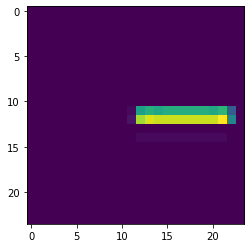

In [112]:
angles = np.array([[[-90.0/180*np.pi],[-90.5/180*np.pi]]])
data.plt_width = 1
imgs = data.generate_images(np.array([[[90/180*np.pi]]]))
plt.imshow(imgs[0,0,...], interpolation='nearest')
plt.show()

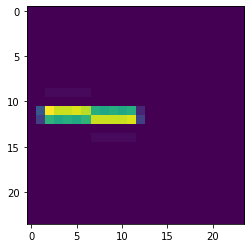

In [49]:
plt.imshow(imgs[0,1,...], interpolation='nearest')
plt.show()

In [79]:
#GENERATE DATA FRO ENCODER TRAINING

from PendulumGeneration import Pendulum
img_size = 24


pend_params = Pendulum.pendulum_default_params()
pend_params[Pendulum.SIM_DT_KEY] = 1e-5
pend_params[Pendulum.DT_KEY] = 5e-3
pend_params[Pendulum.SIMULATION_LENGTH_KEY] = 2
data = Pendulum(img_size=img_size,
                pendulum_params=pend_params,
                seed=0)


num = 3600
angles = np.zeros((1, num, 1))
initial_angle = -np.pi
for i in range(num):
    angles[:,i,:] = initial_angle + i * 0.1/180 *np.pi
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]
imgs = data.generate_images(angles)
distinct, indices = np.unique(imgs, axis = 1, return_index=True)
print(distinct.shape)
sorted_target = np.take(angles, np.sort(indices))
sorted_input =np.take(imgs, np.sort(indices), axis=1)
train_inp = np.repeat(sorted_input, repeats=100, axis=1)
train_tar = np.repeat(sorted_target, repeats=100)
val_inp = np.repeat(sorted_input, repeats=50, axis=1)
val_tar = np.repeat(sorted_target, repeats=50)
test_inp = np.repeat(sorted_input, repeats=1, axis=1)
test_tar = np.repeat(sorted_target, repeats=1)

for p in probs:
    input_train = torch.from_numpy(train_inp.copy())
    input_val = torch.from_numpy(val_inp.copy())
    input_test = torch.from_numpy(test_inp.copy())

    probabilities_train = torch.ones_like(input_train) * p
    probabilities_val = torch.ones_like(input_val) * p
    probabilities_test = torch.ones_like(input_test) * p

    locations_train = torch.bernoulli(probabilities_train)
    locations_val = torch.bernoulli(probabilities_val)
    locations_test = torch.bernoulli(probabilities_test)

    random_array_train = torch.randint(0, 255, locations_train.shape)
    random_array_val = torch.randint(0, 255, locations_val.shape)
    random_array_test = torch.randint(0, 255, locations_test.shape)

    noisy_images_train = input_train * (torch.ones_like(locations_train) - locations_train) + locations_train * random_array_train
    noisy_images_val = input_val * (torch.ones_like(locations_val) - locations_val) + locations_val * random_array_val
    noisy_images_test = input_test * (torch.ones_like(locations_test) - locations_test) + locations_test * random_array_test

     # 1 where we want to change ethe pixel



    os.makedirs(r".\Datasets\Pendulum\encoder_dataset/grid_search/", exist_ok=True)
    np.savez(rf".\Datasets\Pendulum\encoder_dataset\pendulum_images_noisy_encoder_big_p_{p}_grid.npz",
             training_input=noisy_images_train, training_target=train_tar , validation_input=noisy_images_val, validation_target=val_tar ,
             test_input=noisy_images_test, test_target=test_tar)

0
(1, 422, 24, 24)


-50.4


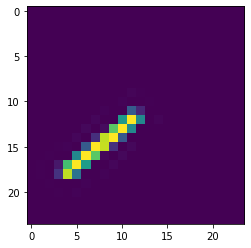

In [68]:
ind = 75000
print(train_tar[ind]*180/np.pi)
plt.imshow(train_inp[0,ind,...], interpolation='nearest')
plt.show()

In [111]:
sorted_target = np.take(angles, np.sort(indices))
sorted_input =np.take(imgs, np.sort(indices), axis=1)

In [112]:
train_inp = np.repeat(sorted_input, repeats=3, axis=1)
train_tar = np.repeat(sorted_target, repeats=3)
val_inp = np.repeat(sorted_input, repeats=1, axis=1)
val_tar = np.repeat(sorted_target, repeats=1)
test_inp = np.repeat(sorted_input, repeats=2, axis=1)
test_tar = np.repeat(sorted_target, repeats=2)


In [105]:
sorted_target.shape

(422,)

In [113]:
os.makedirs(r".\Datasets\Pendulum\encoder_dataset/", exist_ok=True)
np.savez(rf".\Datasets\Pendulum\encoder_dataset\pendulum_images_clean_encoder.npz",
         training_input=train_inp, training_target=train_tar , validation_input=val_inp, validation_target=val_tar ,
         test_input=test_inp, test_target=test_tar )

In [102]:
aa = np.repeat(sorted_input, repeats=3, axis = 1)

In [104]:
aa.shape

(1, 1266, 24, 24)

In [152]:
probs = [1.0, 1-1/32, 1-1/16, 1-1/8, 1-1/4, 1/2, 1/4, 1/8,  1/16, 1/32]

for p in probs:
    data = np.load(rf"Simulations_results/Pendulum/Encoder_big_net_optimal_hyp_big/salt&pepper/losses/loss_p_{p}.npz")
    print(np.square(np.std(data["error_rad"])))
    print(data["MSE_avg_linear_rad"])

3.2640967
3.2640965
3.2640963
3.264097
1.839452
1.8394578
0.810375
0.81048614
0.14776103
0.14791319
0.017917784
0.018984638
0.0015811812
0.001615186
0.00023689414
0.00023708791
0.00017378543
0.00017418679
6.105467e-05
6.15006e-05


In [78]:
data["training_input"][:,0:10:500,...].shape

(1, 1, 24, 24)

In [148]:
for i in range(3):
    data = input[i::3], target[i::3]
    print(data[0].shape)
    print(data[1].shape)

torch.Size([422, 1, 24, 24])
torch.Size([422, 1])
torch.Size([422, 1, 24, 24])
torch.Size([422, 1])
torch.Size([422, 1, 24, 24])
torch.Size([422, 1])


In [122]:
t.shape

torch.Size([2, 2, 1])

In [46]:
aa = np.array([1,2,3,4,5,6])
bb = np.repeat(aa, 3)
len(aa)

6

In [33]:
a = np.load(r"C:\Users\damis\KalmanNetDrive\KalmanNet_Visual\KalmanNet_VO\Datasets\Pendulum\images_clean\pendulum_images_clean_q2_1e+00_v_0.npz")
a["validation_set"].shape

(1000, 400, 24, 24)

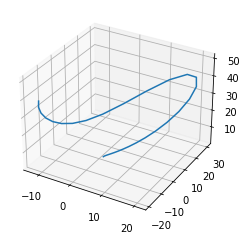

In [38]:
def evo(x, dt=0.02, J=5):
    x1, x2, x2 = x
    A = np.array([[-10, 10, 0], [28, -1, -x1], [0, x1, -8/3]])
    F = np.sum([np.linalg.matrix_power(A*dt,j)/math.factorial(j) for j in range(1, J+1)], axis=0) + np.eye(3)
    return np.matmul(F, x)
start = np.array([1,1,1])
evolution = [start]
steps=30
for i in range(steps):
    evolution.append(evo(evolution[i]))
evolution = np.array(evolution)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(evolution[:,0], evolution[:,1], evolution[:,2])


In [35]:
evolution[:,0]

array([  1.        ,   1.04883325,   1.18700656,   1.4101072 ,
         1.72251289,   2.13597358,   2.66902147,   3.34685059,
         4.20128022,   5.27023161,   6.59572177,   8.21858821,
        10.16692554,  12.43382611,  14.94001636,  17.48273633,
        19.69111003,  21.04134117,  20.99964792,  19.28324468,
        16.06370072,  11.90328802,   7.46256025,   3.23652518,
        -0.52328274,  -3.74821257,  -6.4583064 ,  -8.69097153,
       -10.46296374, -11.7599132 , -12.54640887])

In [219]:
ciao = np.array([1])
if ciao:
    print("bella")

bella


In [69]:
a = [1,2,3]
a.reverse()
a

[3, 2, 1]

In [78]:
a = np.load("Simulations_results/Pendulum/Encoder_big_net_optimal_hyp_big/salt&pepper/losses/loss_p_0.25.npz")
a["MSE_avg_linear_rad"]

array(0.00161519, dtype=float32)

In [167]:
 d= np.load("Datasets/Pendulum/Encoder_dataset/pendulum_images_noisy_encoder_big_p_0.5.npz")
d["test_target"].shape

(84400,)

In [204]:
aa = torch.randint(10,size=(2,10)).float()
print(aa)
torch.mean(aa, dim = 1)

tensor([[2., 8., 3., 6., 9., 4., 4., 3., 0., 9.],
        [7., 4., 1., 1., 7., 6., 4., 3., 1., 3.]])


tensor([4.8000, 3.7000])

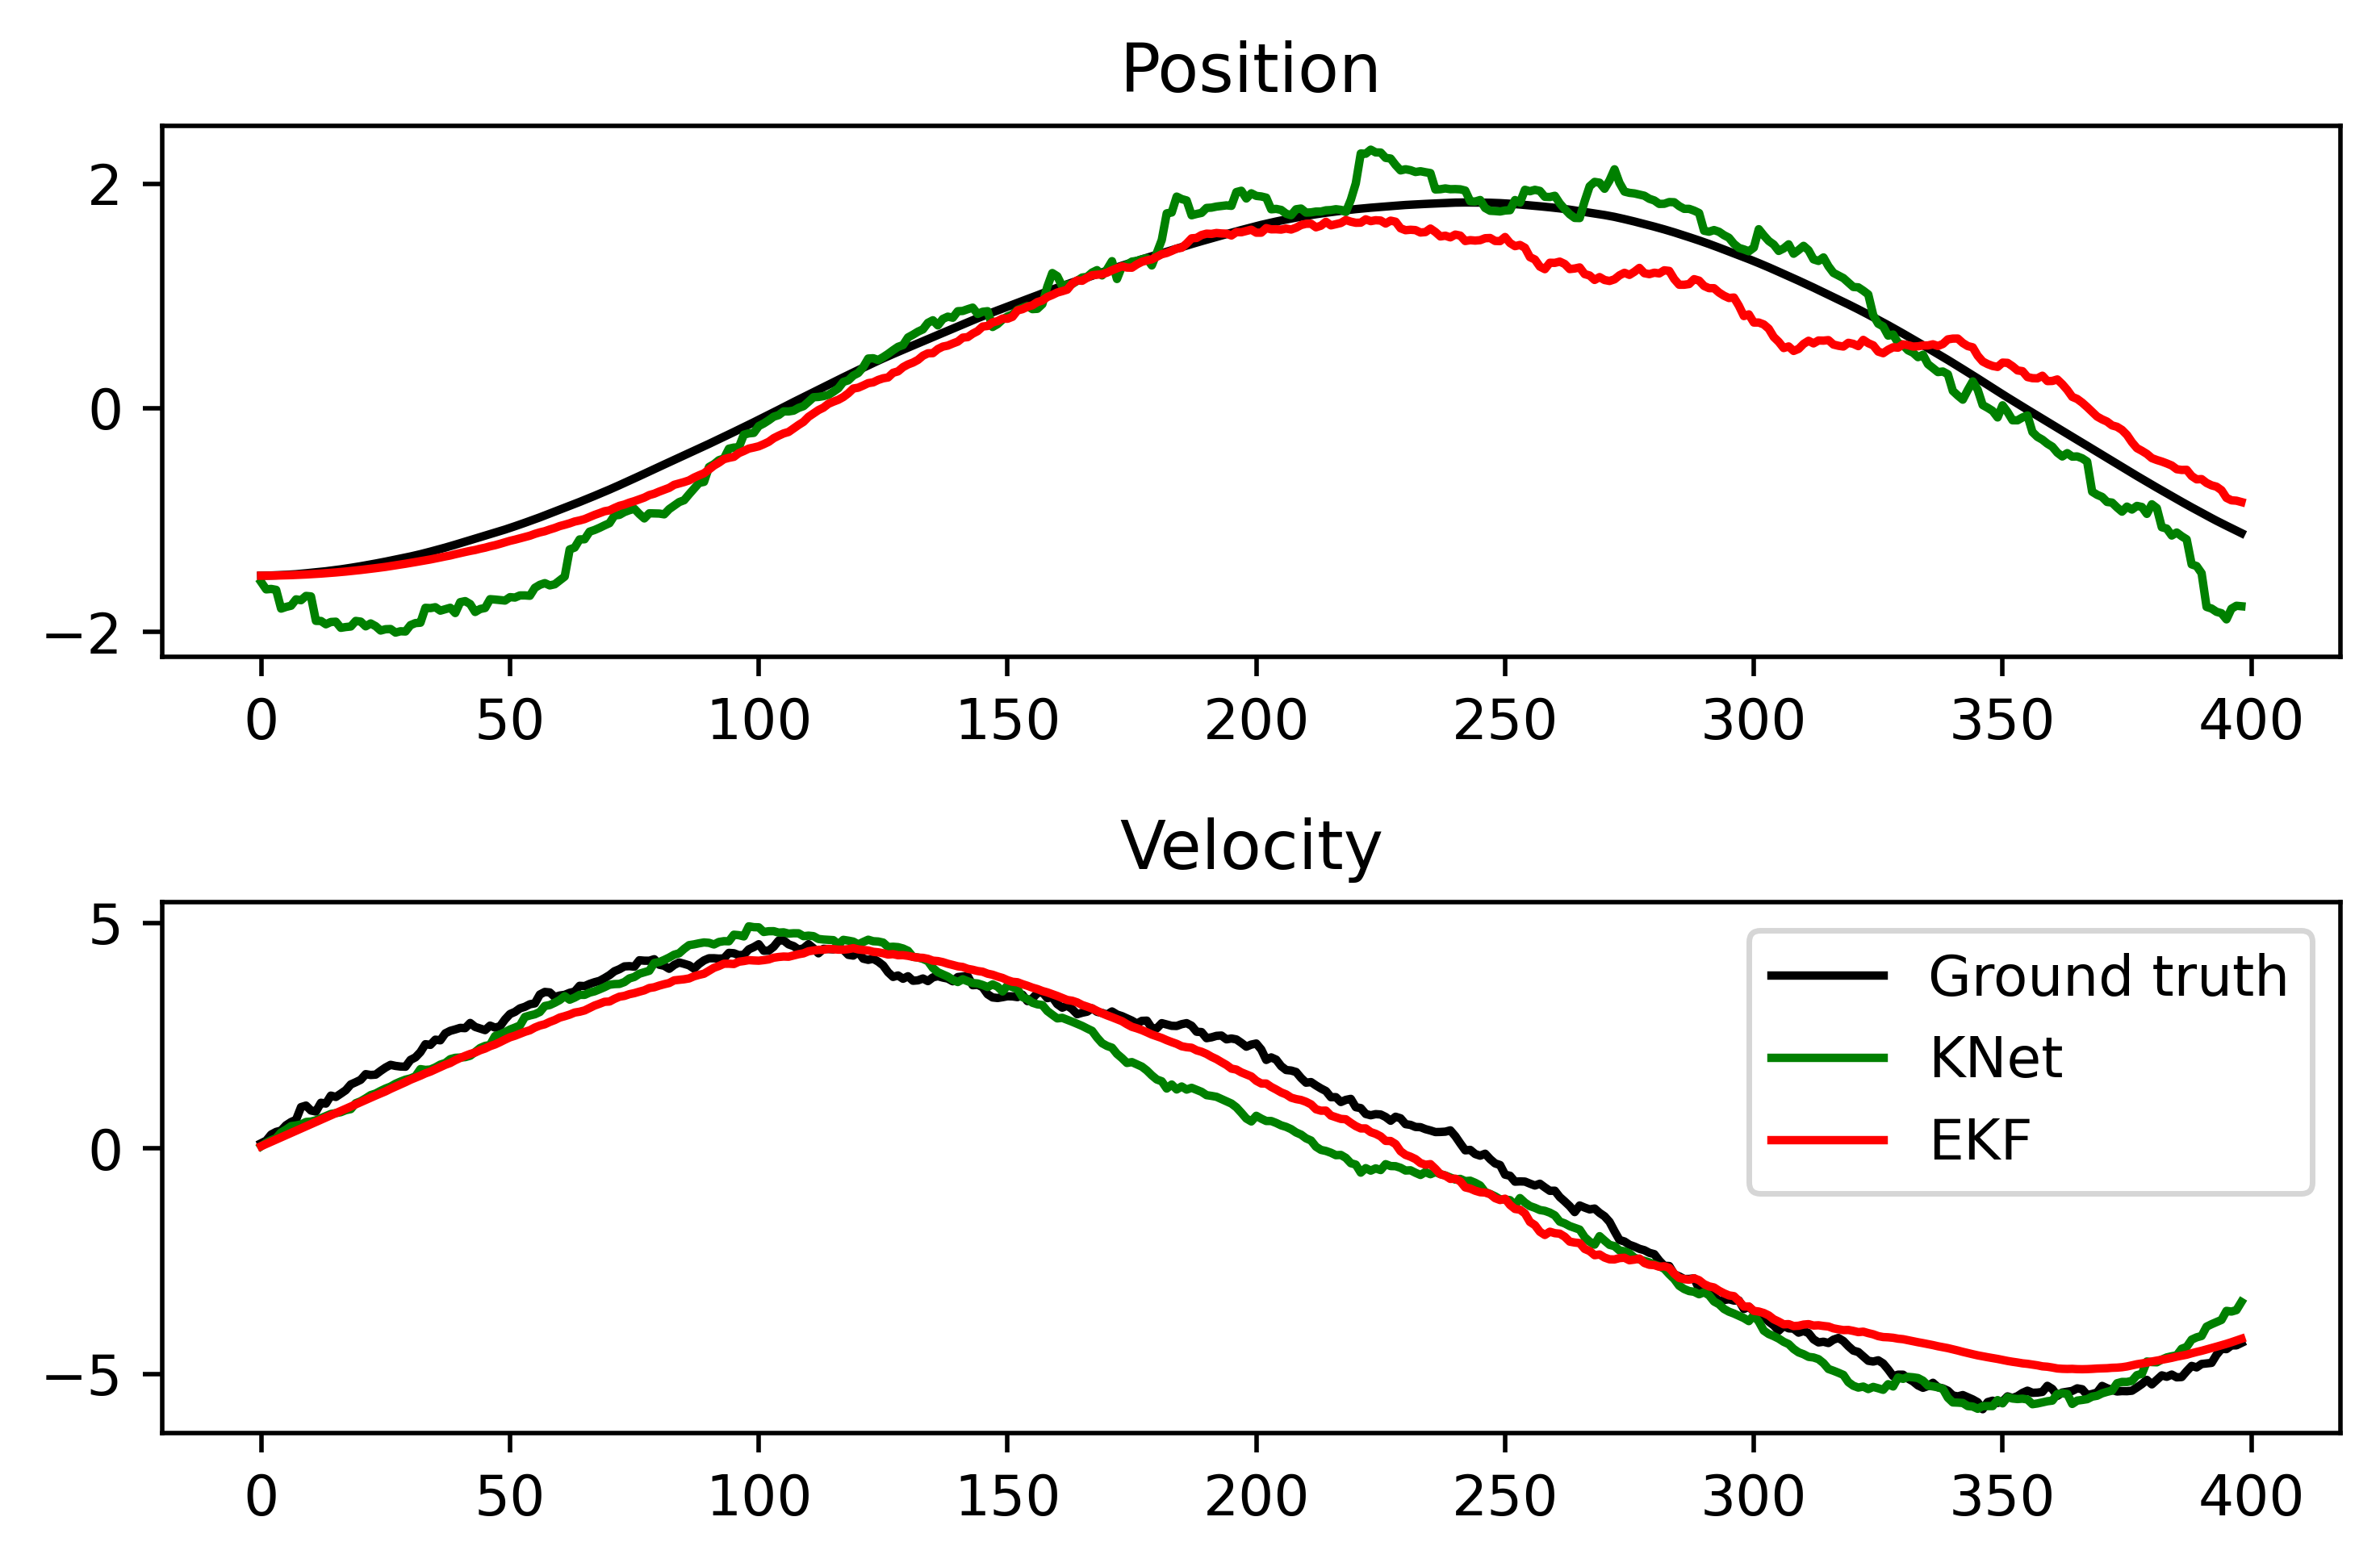

In [5]:
q2 = 1
r2 = 10
v = 0
index=10
steps = 399
ground = np.load(f"Datasets/Pendulum/decimated_clean_data/pendulum_decimated_q2_{q2:.0e}_v_{v}.npz")["test_set"][index, :, 1:]
kalman = np.load("Simulations_results/Pendulum/KalmanNet/constant_q2_experiment/tuning_experiments/experiment_continuous_training_b1_lr0.001/losses/test_loss.npz")["test_out"][index, :, :]
ekf = np.load("Simulations_results/Pendulum/EKF/constant_q2_experiment_GRID/partial_observation_model_opt_wrt_theta/const_q2_1e+00_r2_1e+01.npz")["results_plain"][index, :, :]
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(np.arange(steps), ground[0], 'k', label="Ground truth")
ax[0].plot(np.arange(steps), kalman[0], 'g', label="KNet")
ax[0].plot(np.arange(steps), ekf[0], 'r', label="EKF")
ax[0].set_title("Position")
ax[1].plot(np.arange(steps), ground[1], 'k', label="Ground truth")
ax[1].plot(np.arange(steps), kalman[1], 'g', label="KNet")
ax[1].plot(np.arange(steps), ekf[1], 'r', label="EKF")
ax[1].set_title("Velocity")
ax[1].legend()
plt.tight_layout()
fig.set_dpi(500)
plt.show()

